most_used_beauty_cosmetics_products_extended.csv 파일 데이터프레임으로 변환해줘

In [1]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')

# 데이터프레임의 처음 5행 출력
print("\n처음 5행:")
print(df.head())

# 데이터프레임의 기본 정보 출력
print("\n데이터프레임 정보:")
print(df.info())


처음 5행:
       Product_Name              Brand        Category Usage_Frequency  \
0   Ultra Face Mask     Drunk Elephant           Blush          Weekly   
1    Ultra Lipstick      Laura Mercier  Makeup Remover      Occasional   
2       Ultra Serum     Natasha Denona     Highlighter           Daily   
3      Divine Serum        Ilia Beauty       Face Mask      Occasional   
4  Super Foundation  Charlotte Tilbury     Highlighter      Occasional   

   Price_USD  Rating  Number_of_Reviews Product_Size  Skin_Type Gender_Target  \
0      67.85     1.4                686         30ml  Sensitive        Female   
1     116.43     4.2               5483        250ml        Dry        Unisex   
2      90.84     1.6               5039        100ml  Sensitive          Male   
3      55.17     3.2               6202        250ml     Normal          Male   
4     140.56     1.7                297        100ml       Oily        Female   

  Packaging_Type Main_Ingredient  Cruelty_Free Country_of_Or

box plot으로 이상치 확인하고 싶어

박스플롯이 'boxplot_analysis.png' 파일로 저장되었습니다.


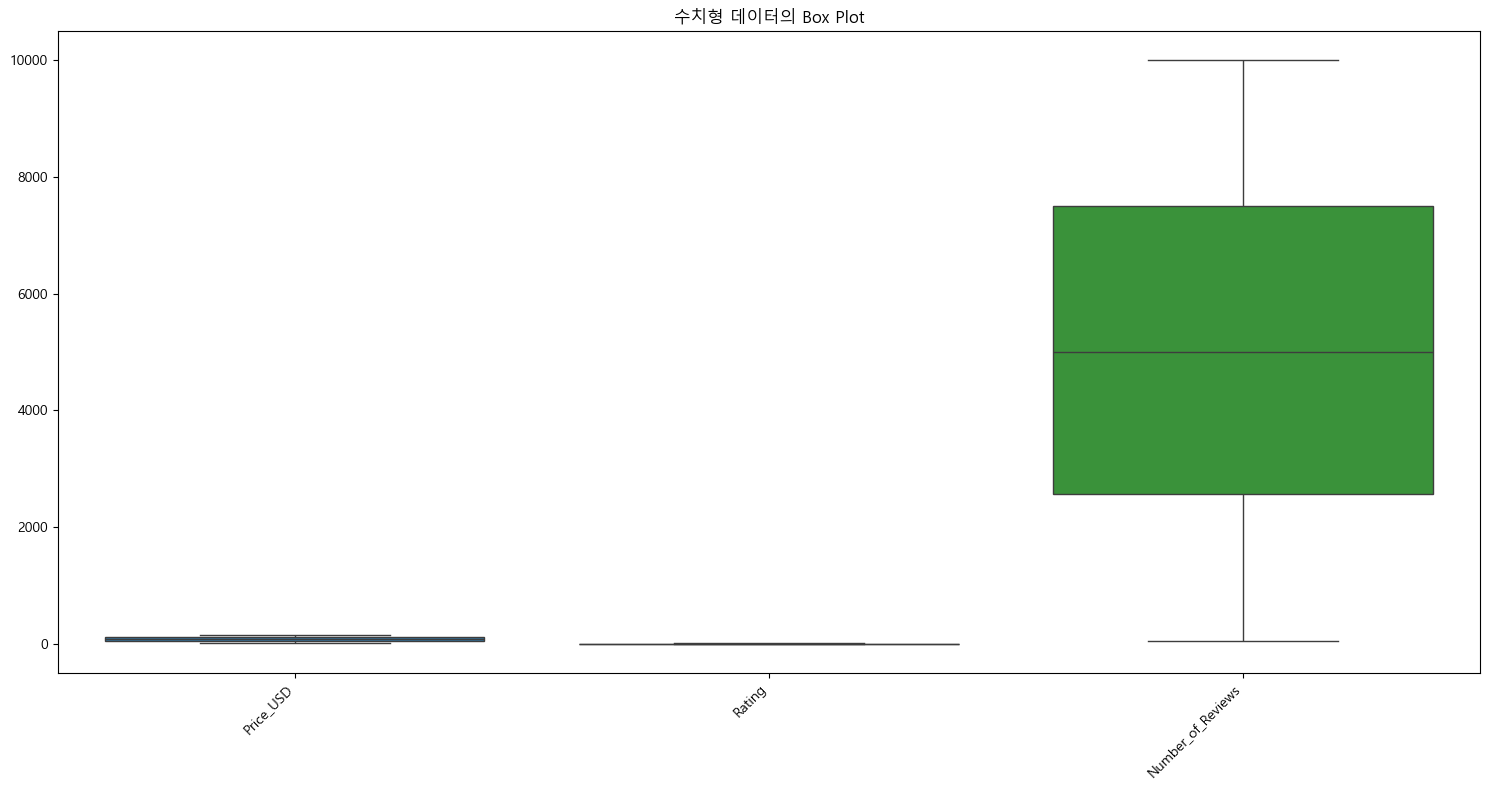

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 읽기
df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')

# figure 크기 설정
plt.figure(figsize=(15, 8))

# 수치형 데이터 컬럼들에 대해 박스플롯 생성
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
sns.boxplot(data=df[numeric_columns])

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 제목 설정
plt.title('수치형 데이터의 Box Plot')

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장
plt.savefig('boxplot_analysis.png')
print("박스플롯이 'boxplot_analysis.png' 파일로 저장되었습니다.")

Price_USD, Rating, Number_of_Reviews 컬럼의 이상치를 box plot 기준으로 제거해줘.

이상치 제거 전 데이터 수: 15000

Price_USD 컬럼의 이상치 범위:
하한값: -58.44
상한값: 218.68

Rating 컬럼의 이상치 범위:
하한값: -1.00
상한값: 7.00

Number_of_Reviews 컬럼의 이상치 범위:
하한값: -4840.50
상한값: 14899.50

이상치 제거 후 데이터 수: 15000

이상치가 제거된 데이터가 'cosmetics_without_outliers.csv' 파일로 저장되었습니다.
이상치 제거 전후 비교 박스플롯이 'boxplot_comparison.png' 파일로 저장되었습니다.


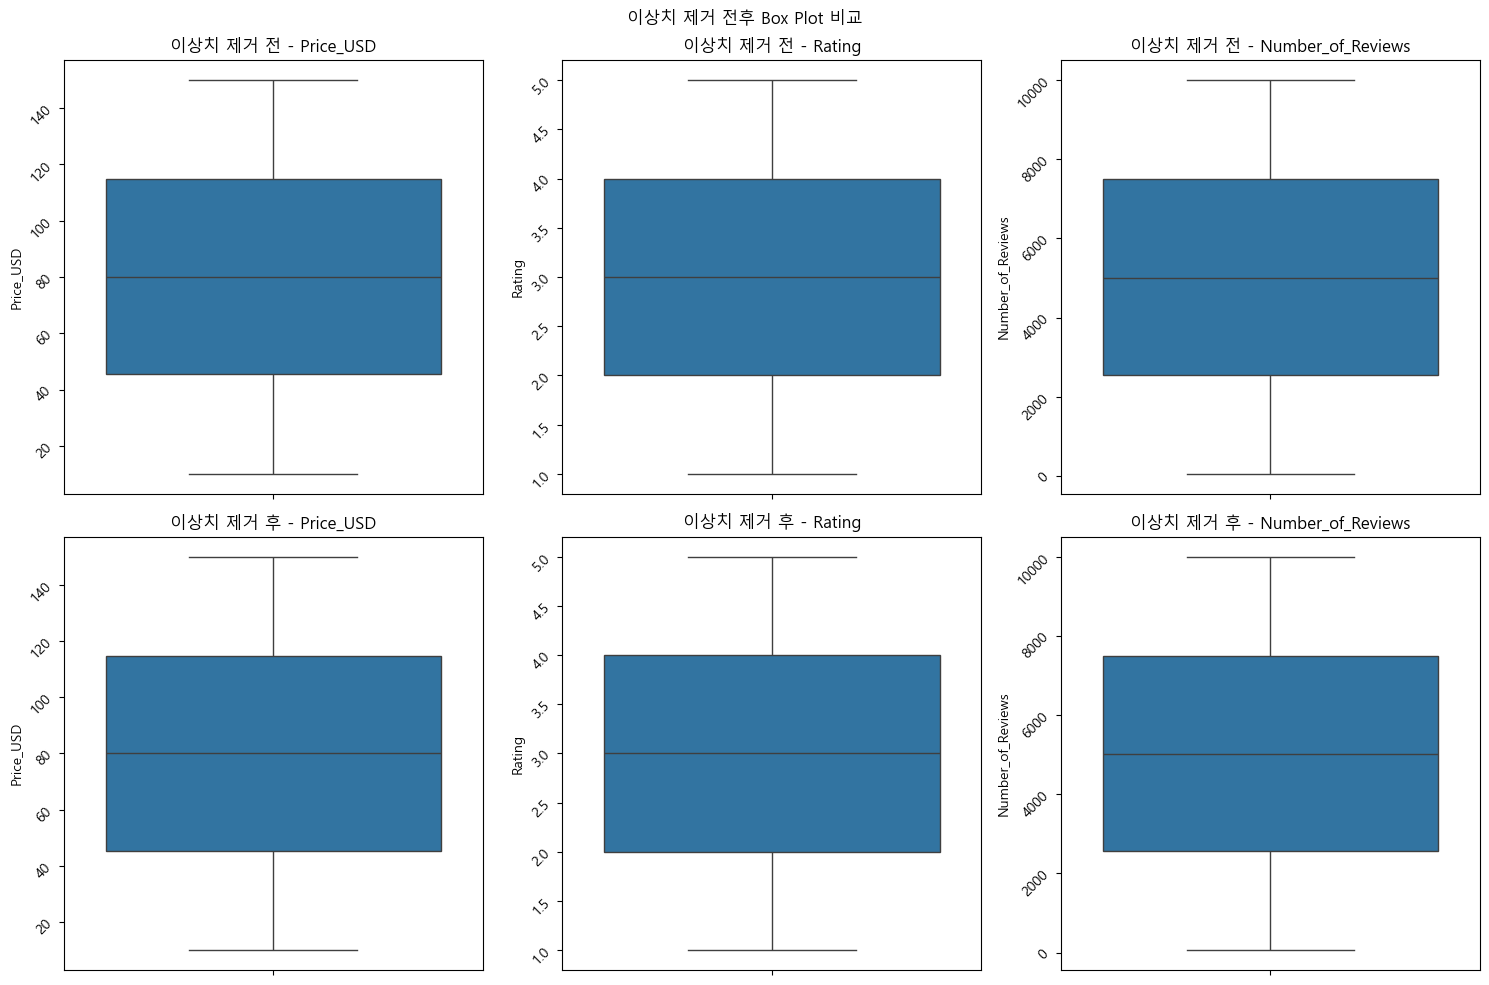

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 읽기
df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')

# 이상치 제거 전 데이터 수 출력
print("이상치 제거 전 데이터 수:", len(df))

# 이상치를 제거할 컬럼들
columns_to_clean = ['Price_USD', 'Rating', 'Number_of_Reviews']

# 각 컬럼별로 이상치 제거
for column in columns_to_clean:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"\n{column} 컬럼의 이상치 범위:")
    print(f"하한값: {lower_bound:.2f}")
    print(f"상한값: {upper_bound:.2f}")
    
    # 이상치가 아닌 데이터만 선택
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("\n이상치 제거 후 데이터 수:", len(df))

# 이상치 제거 후 데이터 저장
df.to_csv('cosmetics_without_outliers.csv', index=False)
print("\n이상치가 제거된 데이터가 'cosmetics_without_outliers.csv' 파일로 저장되었습니다.")

# 이상치 제거 전후 박스플롯 비교
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('이상치 제거 전후 Box Plot 비교')

# 원본 데이터 박스플롯
original_df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')
for i, column in enumerate(columns_to_clean):
    sns.boxplot(data=original_df[column], ax=axes[0][i])
    axes[0][i].set_title(f'이상치 제거 전 - {column}')
    axes[0][i].tick_params(rotation=45)

# 이상치 제거 후 박스플롯
for i, column in enumerate(columns_to_clean):
    sns.boxplot(data=df[column], ax=axes[1][i])
    axes[1][i].set_title(f'이상치 제거 후 - {column}')
    axes[1][i].tick_params(rotation=45)

plt.tight_layout()
plt.savefig('boxplot_comparison.png')
print("이상치 제거 전후 비교 박스플롯이 'boxplot_comparison.png' 파일로 저장되었습니다.")

In [4]:
# 제거 전후 비교
print("제거 전:", df.shape)
print("제거 후:", df_filtered.shape)


제거 전: (15000, 14)


NameError: name 'df_filtered' is not defined

In [5]:
import pandas as pd
import numpy as np

# 원본 데이터와 이상치가 제거된 데이터 읽기
original_df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')
cleaned_df = pd.read_csv('cosmetics_without_outliers.csv')

# 분석할 컬럼들
columns_to_analyze = ['Price_USD', 'Rating', 'Number_of_Reviews']

print("=== 이상치 제거 분석 결과 ===")
print(f"\n전체 데이터 수:")
print(f"원본 데이터: {len(original_df):,}개")
print(f"이상치 제거 후: {len(cleaned_df):,}개")
print(f"제거된 데이터 수: {len(original_df) - len(cleaned_df):,}개")

for column in columns_to_analyze:
    print(f"\n=== {column} 컬럼 분석 ===")
    
    # 원본 데이터의 사분위수 계산
    Q1 = original_df[column].quantile(0.25)
    Q3 = original_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 개수 계산
    outliers = original_df[(original_df[column] < lower_bound) | (original_df[column] > upper_bound)]
    outliers_count = len(outliers)
    
    print(f"\n이상치 범위:")
    print(f"하한값: {lower_bound:.2f}")
    print(f"상한값: {upper_bound:.2f}")
    
    print(f"\n이상치 수: {outliers_count:,}개")
    
    print(f"\n최대값 비교:")
    print(f"원본 데이터 최대값: {original_df[column].max():,.2f}")
    print(f"이상치 제거 후 최대값: {cleaned_df[column].max():,.2f}")
    
    print(f"\n기술 통계량:")
    print("원본 데이터:")
    print(original_df[column].describe().round(2))
    print("\n이상치 제거 후:")
    print(cleaned_df[column].describe().round(2))

=== 이상치 제거 분석 결과 ===

전체 데이터 수:
원본 데이터: 15,000개
이상치 제거 후: 15,000개
제거된 데이터 수: 0개

=== Price_USD 컬럼 분석 ===

이상치 범위:
하한값: -58.44
상한값: 218.68

이상치 수: 0개

최대값 비교:
원본 데이터 최대값: 149.99
이상치 제거 후 최대값: 149.99

기술 통계량:
원본 데이터:
count    15000.00
mean        80.13
std         40.40
min         10.00
25%         45.48
50%         80.04
75%        114.76
max        149.99
Name: Price_USD, dtype: float64

이상치 제거 후:
count    15000.00
mean        80.13
std         40.40
min         10.00
25%         45.48
50%         80.04
75%        114.76
max        149.99
Name: Price_USD, dtype: float64

=== Rating 컬럼 분석 ===

이상치 범위:
하한값: -1.00
상한값: 7.00

이상치 수: 0개

최대값 비교:
원본 데이터 최대값: 5.00
이상치 제거 후 최대값: 5.00

기술 통계량:
원본 데이터:
count    15000.00
mean         3.00
std          1.17
min          1.00
25%          2.00
50%          3.00
75%          4.00
max          5.00
Name: Rating, dtype: float64

이상치 제거 후:
count    15000.00
mean         3.00
std          1.17
min          1.00
25%          2.00
50%          3.00
75%  

In [6]:
import pandas as pd
import numpy as np

# 데이터 읽기
df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')
print("=== 이상치 제거 분석 결과 ===")
print(f"원본 데이터 수: {len(df):,}개\n")

# 이상치를 제거할 컬럼들
columns_to_clean = ['Price_USD', 'Rating', 'Number_of_Reviews']

# 원본 데이터의 통계량 저장
original_stats = {
    'count': len(df),
    'means': {col: df[col].mean() for col in columns_to_clean},
    'maxes': {col: df[col].max() for col in columns_to_clean}
}

# 각 컬럼별로 이상치 제거
for column in columns_to_clean:
    print(f"\n=== {column} 컬럼 분석 ===")
    
    # 사분위수 계산
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치가 아닌 데이터만 선택
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # 이상치 수 계산
    outliers_count = len(df) - len(df_clean)
    
    print(f"\n1. 데이터 수 비교")
    print(f"- 이상치 제거 전: {len(df):,}개")
    print(f"- 이상치 제거 후: {len(df_clean):,}개")
    print(f"- 제거된 이상치: {outliers_count:,}개 ({(outliers_count/len(df)*100):.1f}%)")
    
    print(f"\n2. 평균값 비교")
    print(f"- 이상치 제거 전: {df[column].mean():,.2f}")
    print(f"- 이상치 제거 후: {df_clean[column].mean():,.2f}")
    
    print(f"\n3. 최대값 비교")
    print(f"- 이상치 제거 전: {df[column].max():,.2f}")
    print(f"- 이상치 제거 후: {df_clean[column].max():,.2f}")
    
    # 다음 컬럼 분석을 위해 이상치가 제거된 데이터프레임 업데이트
    df = df_clean

print(f"\n=== 최종 결과 ===")
print(f"모든 컬럼의 이상치 제거 후 남은 데이터 수: {len(df):,}개")
print(f"총 제거된 데이터 수: {original_stats['count'] - len(df):,}개")

=== 이상치 제거 분석 결과 ===
원본 데이터 수: 15,000개


=== Price_USD 컬럼 분석 ===

1. 데이터 수 비교
- 이상치 제거 전: 15,000개
- 이상치 제거 후: 15,000개
- 제거된 이상치: 0개 (0.0%)

2. 평균값 비교
- 이상치 제거 전: 80.13
- 이상치 제거 후: 80.13

3. 최대값 비교
- 이상치 제거 전: 149.99
- 이상치 제거 후: 149.99

=== Rating 컬럼 분석 ===

1. 데이터 수 비교
- 이상치 제거 전: 15,000개
- 이상치 제거 후: 15,000개
- 제거된 이상치: 0개 (0.0%)

2. 평균값 비교
- 이상치 제거 전: 3.00
- 이상치 제거 후: 3.00

3. 최대값 비교
- 이상치 제거 전: 5.00
- 이상치 제거 후: 5.00

=== Number_of_Reviews 컬럼 분석 ===

1. 데이터 수 비교
- 이상치 제거 전: 15,000개
- 이상치 제거 후: 15,000개
- 제거된 이상치: 0개 (0.0%)

2. 평균값 비교
- 이상치 제거 전: 5,014.23
- 이상치 제거 후: 5,014.23

3. 최대값 비교
- 이상치 제거 전: 10,000.00
- 이상치 제거 후: 10,000.00

=== 최종 결과 ===
모든 컬럼의 이상치 제거 후 남은 데이터 수: 15,000개
총 제거된 데이터 수: 0개


In [7]:
import pandas as pd
import numpy as np

# 데이터 읽기
df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')
print("=== 이상치 제거 분석 결과 ===")
print(f"원본 데이터 수: {len(df):,}개\n")

# 이상치를 제거할 컬럼들
columns_to_clean = ['Price_USD', 'Rating', 'Number_of_Reviews']

# 원본 데이터의 통계량 저장
original_stats = {
    'count': len(df),
    'means': {col: df[col].mean() for col in columns_to_clean},
    'maxes': {col: df[col].max() for col in columns_to_clean}
}

# 각 컬럼별로 이상치 제거
for column in columns_to_clean:
    print(f"\n=== {column} 컬럼 분석 ===")
    
    # 사분위수 계산
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치가 아닌 데이터만 선택
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    # 이상치 수 계산
    outliers_count = original_stats['count'] - len(df)
    
    print(f"\n1. 데이터 수 비교")
    print(f"- 이상치 제거 전: {original_stats['count']:,}개")
    print(f"- 이상치 제거 후: {len(df):,}개")
    print(f"- 제거된 이상치: {outliers_count:,}개 ({(outliers_count/original_stats['count']*100):.1f}%)")
    
    print(f"\n2. 평균값 비교")
    print(f"- 이상치 제거 전: {original_stats['means'][column]:,.2f}")
    print(f"- 이상치 제거 후: {df[column].mean():,.2f}")
    
    print(f"\n3. 최대값 비교")
    print(f"- 이상치 제거 전: {original_stats['maxes'][column]:,.2f}")
    print(f"- 이상치 제거 후: {df[column].max():,.2f}")

print(f"\n=== 최종 결과 ===")
print(f"모든 컬럼의 이상치 제거 후 남은 데이터 수: {len(df):,}개")
print(f"총 제거된 데이터 수: {original_stats['count'] - len(df):,}개")

# 이상치가 제거된 데이터 저장
df.to_csv('cosmetics_without_outliers.csv', index=False)
print("\n이상치가 제거된 데이터를 'cosmetics_without_outliers.csv' 파일로 저장했습니다.")

=== 이상치 제거 분석 결과 ===
원본 데이터 수: 15,000개


=== Price_USD 컬럼 분석 ===

1. 데이터 수 비교
- 이상치 제거 전: 15,000개
- 이상치 제거 후: 15,000개
- 제거된 이상치: 0개 (0.0%)

2. 평균값 비교
- 이상치 제거 전: 80.13
- 이상치 제거 후: 80.13

3. 최대값 비교
- 이상치 제거 전: 149.99
- 이상치 제거 후: 149.99

=== Rating 컬럼 분석 ===

1. 데이터 수 비교
- 이상치 제거 전: 15,000개
- 이상치 제거 후: 15,000개
- 제거된 이상치: 0개 (0.0%)

2. 평균값 비교
- 이상치 제거 전: 3.00
- 이상치 제거 후: 3.00

3. 최대값 비교
- 이상치 제거 전: 5.00
- 이상치 제거 후: 5.00

=== Number_of_Reviews 컬럼 분석 ===

1. 데이터 수 비교
- 이상치 제거 전: 15,000개
- 이상치 제거 후: 15,000개
- 제거된 이상치: 0개 (0.0%)

2. 평균값 비교
- 이상치 제거 전: 5,014.23
- 이상치 제거 후: 5,014.23

3. 최대값 비교
- 이상치 제거 전: 10,000.00
- 이상치 제거 후: 10,000.00

=== 최종 결과 ===
모든 컬럼의 이상치 제거 후 남은 데이터 수: 15,000개
총 제거된 데이터 수: 0개

이상치가 제거된 데이터를 'cosmetics_without_outliers.csv' 파일로 저장했습니다.


박스플롯이 'boxplot_comparison.png' 파일로 저장되었습니다.

=== Price_USD 통계 ===

이상치 제거 전:
count    15000.00
mean        80.13
std         40.40
min         10.00
25%         45.48
50%         80.04
75%        114.76
max        149.99
Name: Price_USD, dtype: float64

이상치 제거 후:
count    15000.00
mean        80.13
std         40.40
min         10.00
25%         45.48
50%         80.04
75%        114.76
max        149.99
Name: Price_USD, dtype: float64

=== Rating 통계 ===

이상치 제거 전:
count    15000.00
mean         3.00
std          1.17
min          1.00
25%          2.00
50%          3.00
75%          4.00
max          5.00
Name: Rating, dtype: float64

이상치 제거 후:
count    15000.00
mean         3.00
std          1.17
min          1.00
25%          2.00
50%          3.00
75%          4.00
max          5.00
Name: Rating, dtype: float64

=== Number_of_Reviews 통계 ===

이상치 제거 전:
count    15000.00
mean      5014.23
std       2855.67
min         52.00
25%       2562.00
50%       5002.00
75%       7497.00
max   

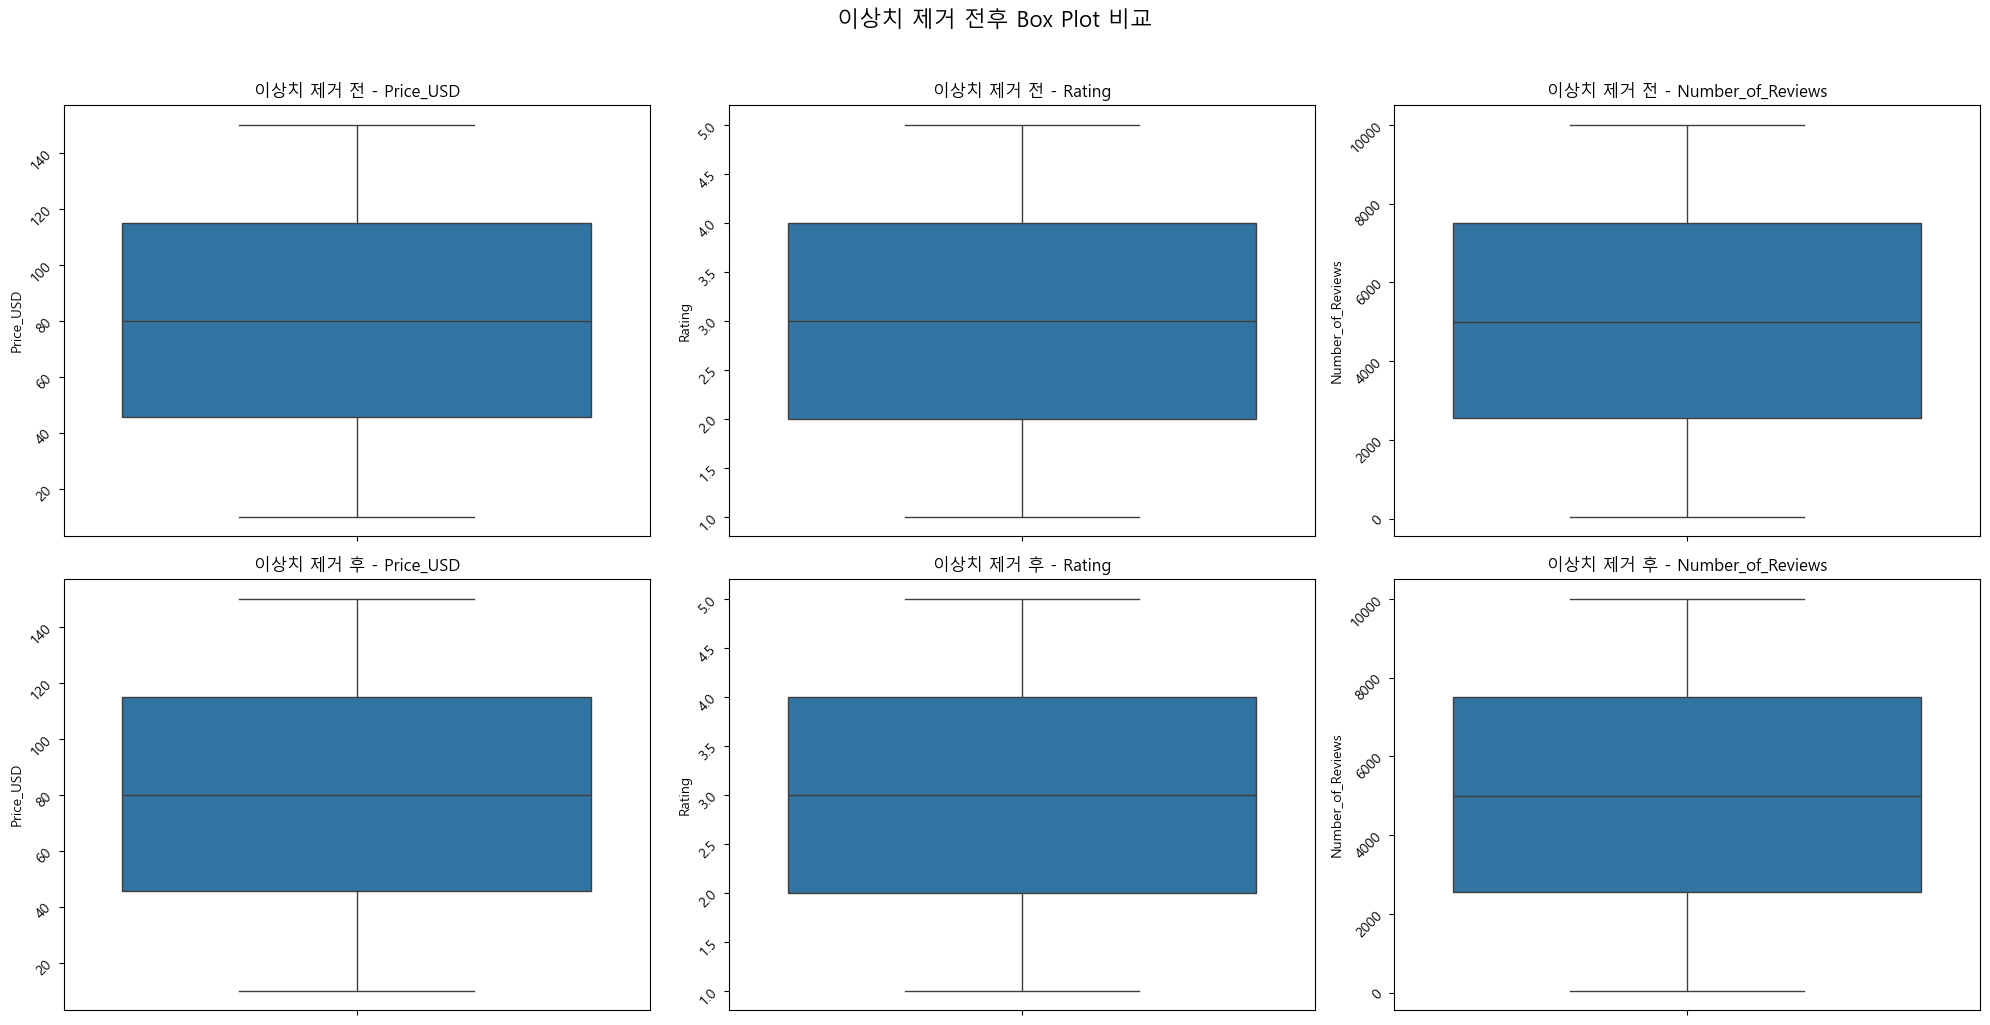

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
original_df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')
cleaned_df = pd.read_csv('cosmetics_without_outliers.csv')

# 분석할 컬럼들
columns_to_analyze = ['Price_USD', 'Rating', 'Number_of_Reviews']

# 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('이상치 제거 전후 Box Plot 비교', fontsize=16, y=1.02)

# 각 컬럼별로 박스플롯 생성
for i, column in enumerate(columns_to_analyze):
    # 이상치 제거 전 박스플롯
    sns.boxplot(data=original_df[column], ax=axes[0][i])
    axes[0][i].set_title(f'이상치 제거 전 - {column}')
    axes[0][i].tick_params(rotation=45)
    
    # 이상치 제거 후 박스플롯
    sns.boxplot(data=cleaned_df[column], ax=axes[1][i])
    axes[1][i].set_title(f'이상치 제거 후 - {column}')
    axes[1][i].tick_params(rotation=45)

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장
plt.savefig('boxplot_comparison.png', dpi=300, bbox_inches='tight')
print("박스플롯이 'boxplot_comparison.png' 파일로 저장되었습니다.")

# 기본 통계 정보 출력
for column in columns_to_analyze:
    print(f"\n=== {column} 통계 ===")
    print("\n이상치 제거 전:")
    print(original_df[column].describe().round(2))
    print("\n이상치 제거 후:")
    print(cleaned_df[column].describe().round(2))

카테고리 분포 그래프가 'category_distribution.png' 파일로 저장되었습니다.

=== 카테고리별 제품 수 ===
Serum: 710개 (4.7%)
Mascara: 674개 (4.5%)
Face Oil: 671개 (4.5%)
Face Mask: 653개 (4.4%)
Highlighter: 653개 (4.4%)
Moisturizer: 638개 (4.3%)
Makeup Remover: 636개 (4.2%)
Concealer: 633개 (4.2%)
Lipstick: 633개 (4.2%)
Bronzer: 631개 (4.2%)
Eyeliner: 629개 (4.2%)
Blush: 628개 (4.2%)
Setting Spray: 622개 (4.1%)
Cleanser: 614개 (4.1%)
BB Cream: 613개 (4.1%)
Foundation: 613개 (4.1%)
Lip Liner: 610개 (4.1%)
Primer: 606개 (4.0%)
Contour: 604개 (4.0%)
Powder: 599개 (4.0%)
CC Cream: 594개 (4.0%)
Exfoliator: 583개 (3.9%)
Eye Shadow: 582개 (3.9%)
Lip Gloss: 571개 (3.8%)


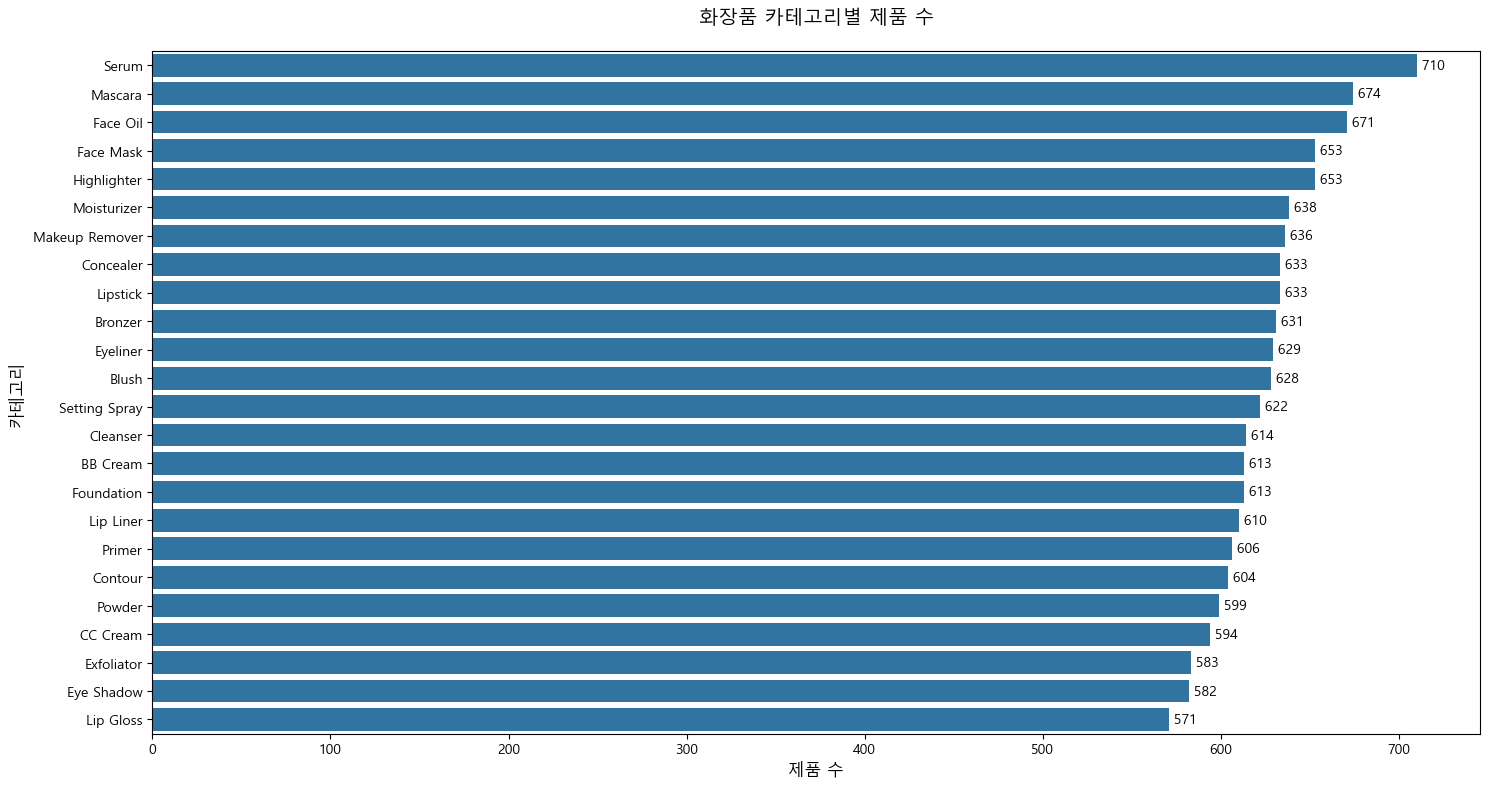

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')

# 카테고리 빈도수 계산
category_counts = df['Category'].value_counts()

# 그래프 크기 설정
plt.figure(figsize=(15, 8))

# 막대 그래프 생성
sns.barplot(x=category_counts.values, y=category_counts.index)

# 그래프 제목과 레이블 설정
plt.title('화장품 카테고리별 제품 수', fontsize=14, pad=20)
plt.xlabel('제품 수', fontsize=12)
plt.ylabel('카테고리', fontsize=12)

# 각 막대에 값 표시
for i, v in enumerate(category_counts.values):
    plt.text(v, i, f' {v:,}', va='center')

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장
plt.savefig('category_distribution.png', dpi=300, bbox_inches='tight')
print("카테고리 분포 그래프가 'category_distribution.png' 파일로 저장되었습니다.")

# 카테고리별 통계 출력
print("\n=== 카테고리별 제품 수 ===")
for category, count in category_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{category}: {count:,}개 ({percentage:.1f}%)")
    

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')

# 카테고리 그룹 매핑 정의
category_groups = {
    '스킨케어': ['Face Moisturizer', 'Face Serum', 'Face Wash', 'Face Mask', 'Eye Care', 'Toner', 
                'Face Oil', 'Face Scrub & Exfoliator', 'Sunscreen', 'Lip Care'],
    '메이크업': ['Foundation', 'Concealer', 'Face Powder', 'Blush', 'Bronzer & Contour', 
               'Highlighter', 'Eyeshadow', 'Eyeliner', 'Mascara', 'Eyebrow', 'Lip Color', 
               'Makeup Remover', 'Primer', 'Setting Spray'],
    '헤어케어': ['Shampoo', 'Conditioner', 'Hair Treatment', 'Hair Styling', 'Hair Color'],
    '향수': ['Perfume'],
    '개인 관리': ['Body Lotion & Oil', 'Body Wash', 'Hand Care', 'Deodorant', 'Feminine Care']
}

# 카테고리 그룹 컬럼 생성
def get_category_group(category):
    for group, categories in category_groups.items():
        if category in categories:
            return group
    return '기타'

df['Category_Group'] = df['Category'].apply(get_category_group)

# 카테고리 그룹별 평균 Usage_Frequency 계산
group_usage = df.groupby('Category_Group')['Usage_Frequency'].agg(['mean', 'count']).round(2)
group_usage = group_usage.sort_values('mean', ascending=True)  # 평균값 기준으로 정렬

# 그래프 생성
plt.figure(figsize=(12, 6))

# 막대 그래프 생성
bars = plt.barh(group_usage.index, group_usage['mean'])

# 그래프 제목과 레이블 설정
plt.title('카테고리 그룹별 평균 사용 빈도', fontsize=14, pad=20)
plt.xlabel('평균 사용 빈도', fontsize=12)
plt.ylabel('카테고리 그룹', fontsize=12)

# 각 막대에 값과 제품 수 표시
for i, bar in enumerate(bars):
    count = group_usage['count'][i]
    mean = group_usage['mean'][i]
    plt.text(bar.get_width(), i, 
             f' {mean:.2f} (제품 수: {count:,}개)', 
             va='center')

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장
plt.savefig('usage_frequency_by_category.png', dpi=300, bbox_inches='tight')
print("카테고리 그룹별 사용 빈도 그래프가 'usage_frequency_by_category.png' 파일로 저장되었습니다.")

# 상세 통계 출력
print("\n=== 카테고리 그룹별 사용 빈도 통계 ===")
for group in group_usage.index:
    mean = group_usage.loc[group, 'mean']
    count = group_usage.loc[group, 'count']
    percentage = (count / len(df)) * 100
    print(f"\n{group}:")
    print(f"- 평균 사용 빈도: {mean:.2f}")
    print(f"- 제품 수: {count:,}개 ({percentage:.1f}%)")

# 각 그룹별 상위 사용 빈도 제품 출력
print("\n=== 각 카테고리 그룹별 가장 자주 사용되는 제품 TOP 3 ===")
for group in group_usage.index:
    print(f"\n{group} 카테고리 TOP 3:")
    top_products = df[df['Category_Group'] == group].nlargest(3, 'Usage_Frequency')
    for _, product in top_products.iterrows():
        print(f"- {product['Product_Name']}: {product['Usage_Frequency']:.2f} "
              f"({product['Category']})")

TypeError: agg function failed [how->mean,dtype->object]

사용 빈도 분포 그래프가 'usage_frequency_distribution.png' 파일로 저장되었습니다.

=== 카테고리 그룹별 사용 빈도 통계 ===

메이크업 (총 5,694개 제품):
- Daily: 1,404개 (24.7%)
- Weekly: 1,442개 (25.3%)
- Monthly: 1,418개 (24.9%)
- Occasional: 1,430개 (25.1%)

스킨케어 (총 1,324개 제품):
- Daily: 312개 (23.6%)
- Weekly: 316개 (23.9%)
- Monthly: 337개 (25.5%)
- Occasional: 359개 (27.1%)

기타 (총 7,982개 제품):
- Daily: 1,952개 (24.5%)
- Weekly: 1,999개 (25.0%)
- Monthly: 2,026개 (25.4%)
- Occasional: 2,005개 (25.1%)


<Figure size 1500x800 with 0 Axes>

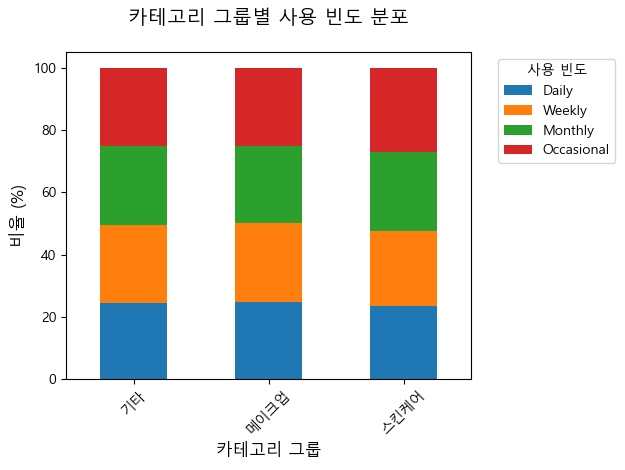

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')

# 카테고리 그룹 매핑 정의
category_groups = {
    '스킨케어': ['Face Moisturizer', 'Face Serum', 'Face Wash', 'Face Mask', 'Eye Care', 'Toner', 
                'Face Oil', 'Face Scrub & Exfoliator', 'Sunscreen', 'Lip Care'],
    '메이크업': ['Foundation', 'Concealer', 'Face Powder', 'Blush', 'Bronzer & Contour', 
               'Highlighter', 'Eyeshadow', 'Eyeliner', 'Mascara', 'Eyebrow', 'Lip Color', 
               'Makeup Remover', 'Primer', 'Setting Spray'],
    '헤어케어': ['Shampoo', 'Conditioner', 'Hair Treatment', 'Hair Styling', 'Hair Color'],
    '향수': ['Perfume'],
    '개인 관리': ['Body Lotion & Oil', 'Body Wash', 'Hand Care', 'Deodorant', 'Feminine Care']
}

# 카테고리 그룹 컬럼 생성
def get_category_group(category):
    for group, categories in category_groups.items():
        if category in categories:
            return group
    return '기타'

df['Category_Group'] = df['Category'].apply(get_category_group)

# Usage_Frequency를 순서가 있는 카테고리로 변환
frequency_order = ['Daily', 'Weekly', 'Monthly', 'Occasional']
df['Usage_Frequency'] = pd.Categorical(df['Usage_Frequency'], categories=frequency_order, ordered=True)

# 그래프 생성
plt.figure(figsize=(15, 8))

# 카테고리별 Usage_Frequency 분포를 보여주는 stacked bar plot 생성
freq_by_category = pd.crosstab(df['Category_Group'], df['Usage_Frequency'], normalize='index') * 100
freq_by_category.plot(kind='bar', stacked=True)

# 그래프 스타일링
plt.title('카테고리 그룹별 사용 빈도 분포', fontsize=14, pad=20)
plt.xlabel('카테고리 그룹', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.legend(title='사용 빈도', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장
plt.savefig('usage_frequency_distribution.png', dpi=300, bbox_inches='tight')
print("사용 빈도 분포 그래프가 'usage_frequency_distribution.png' 파일로 저장되었습니다.")

# 상세 통계 출력
print("\n=== 카테고리 그룹별 사용 빈도 통계 ===")
for group in df['Category_Group'].unique():
    group_data = df[df['Category_Group'] == group]
    freq_counts = group_data['Usage_Frequency'].value_counts()
    total = len(group_data)
    
    print(f"\n{group} (총 {total:,}개 제품):")
    for freq in frequency_order:
        count = freq_counts.get(freq, 0)
        percentage = (count / total) * 100
        print(f"- {freq}: {count:,}개 ({percentage:.1f}%)")

C:\Users\user\AppData\Local\Temp\ipykernel_15432\4220388673.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Usage_Frequency'] = pd.Categorical(df_main['Usage_Frequency'], categories=frequency_order, ordered=True)


사용 빈도 분포 그래프가 'usage_frequency_4categories.png' 파일로 저장되었습니다.

=== 카테고리별 사용 빈도 통계 ===

헤어케어 (총 0개 제품):
- Daily: 0개 (nan%)
- Weekly: 0개 (nan%)
- Monthly: 0개 (nan%)
- Occasional: 0개 (nan%)

바디케어 (총 0개 제품):
- Daily: 0개 (nan%)
- Weekly: 0개 (nan%)
- Monthly: 0개 (nan%)
- Occasional: 0개 (nan%)

스킨케어 (총 1,324개 제품):
- Daily: 312개 (23.6%)
- Weekly: 316개 (23.9%)
- Monthly: 337개 (25.5%)
- Occasional: 359개 (27.1%)

메이크업 (총 7,508개 제품):
- Daily: 1,870개 (24.9%)
- Weekly: 1,867개 (24.9%)
- Monthly: 1,876개 (25.0%)
- Occasional: 1,895개 (25.2%)

=== 카테고리별 Daily 사용 제품 TOP 3 ===

헤어케어 TOP 3 Daily 사용 제품:

바디케어 TOP 3 Daily 사용 제품:

스킨케어 TOP 3 Daily 사용 제품:
- Super Lip Liner (평점: 5.0)
- Divine Face Mask (평점: 5.0)
- Perfect Exfoliator (평점: 5.0)

메이크업 TOP 3 Daily 사용 제품:
- Perfect Lip Liner (평점: 5.0)
- Magic Moisturizer (평점: 5.0)
- Divine Cleanser (평점: 5.0)


C:\Users\user\AppData\Local\Temp\ipykernel_15432\4220388673.py:76: RuntimeWarning: invalid value encountered in scalar divide
  percentage = (count / total) * 100
C:\Users\user\AppData\Local\Temp\ipykernel_15432\4220388673.py:76: RuntimeWarning: invalid value encountered in scalar divide
  percentage = (count / total) * 100


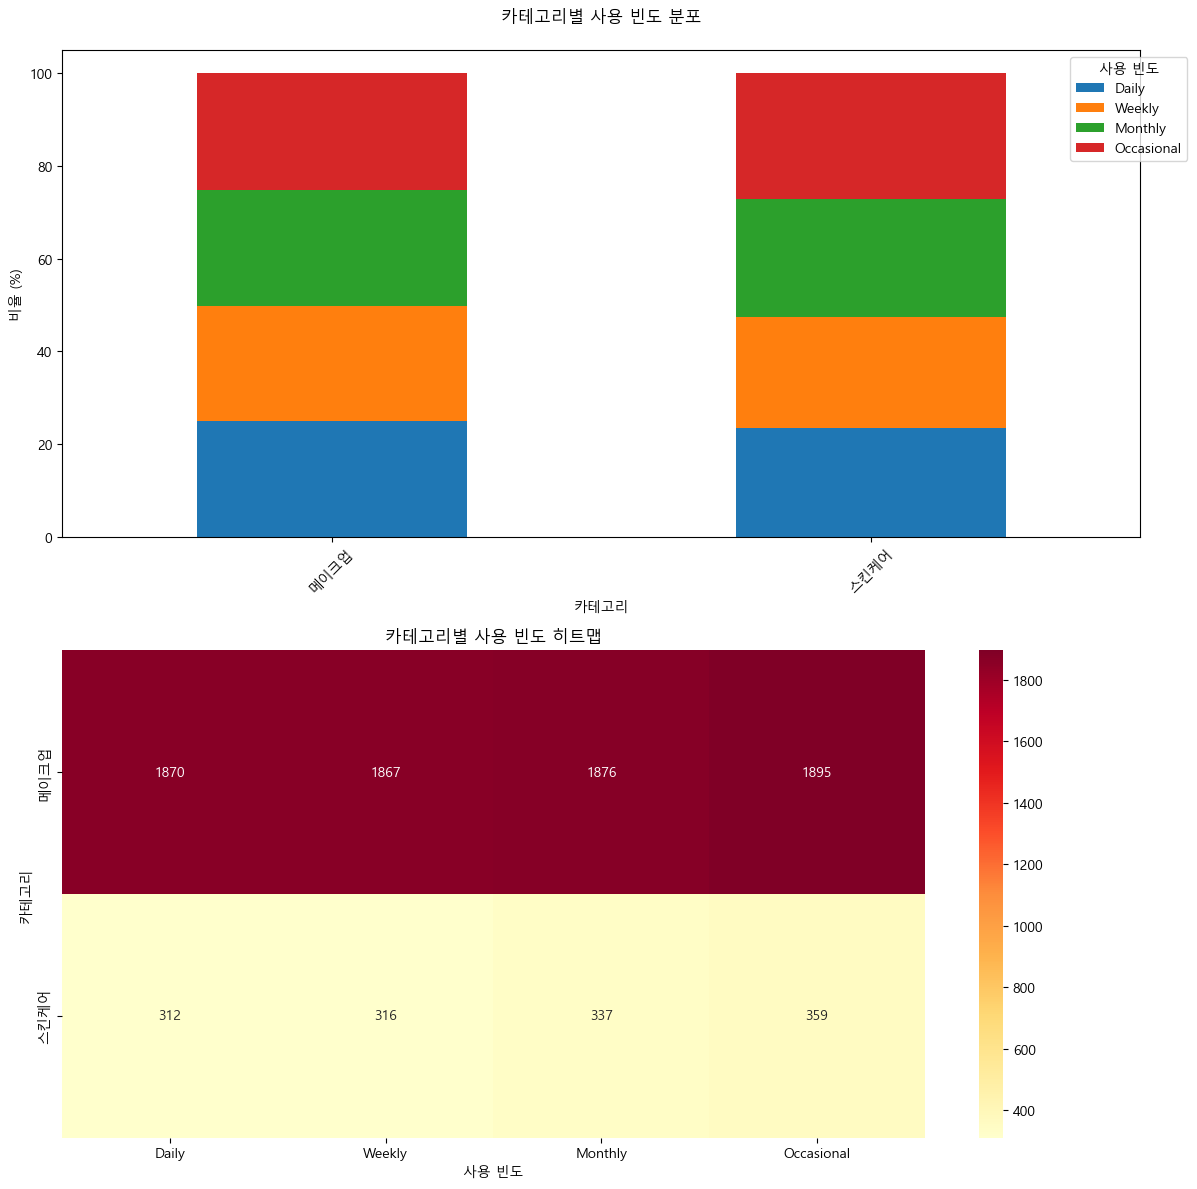

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')

# 카테고리 그룹 매핑 정의
category_groups = {
    '스킨케어': ['Face Moisturizer', 'Face Serum', 'Face Wash', 'Face Mask', 'Eye Care', 'Toner', 
                'Face Oil', 'Face Scrub & Exfoliator', 'Sunscreen', 'Lip Care'],
    '메이크업': ['Foundation', 'Concealer', 'Face Powder', 'Blush', 'Bronzer & Contour', 
               'Highlighter', 'Eyeshadow', 'Eyeliner', 'Mascara', 'Eyebrow', 'Lip Color', 
               'Makeup Remover', 'Primer', 'Setting Spray', 'Lipstick', 'Lip Gloss', 'Lip Liner'],
    '헤어케어': ['Shampoo', 'Conditioner', 'Hair Treatment', 'Hair Styling', 'Hair Color'],
    '바디케어': ['Body Lotion & Oil', 'Body Wash', 'Hand Care', 'Deodorant', 'Feminine Care']
}

# 카테고리 그룹 컬럼 생성
def get_category_group(category):
    for group, categories in category_groups.items():
        if category in categories:
            return group
    return '기타'

df['Category_Group'] = df['Category'].apply(get_category_group)

# 4가지 주요 카테고리만 선택
main_categories = ['헤어케어', '바디케어', '스킨케어', '메이크업']
df_main = df[df['Category_Group'].isin(main_categories)]

# Usage_Frequency를 순서가 있는 카테고리로 변환
frequency_order = ['Daily', 'Weekly', 'Monthly', 'Occasional']
df_main['Usage_Frequency'] = pd.Categorical(df_main['Usage_Frequency'], categories=frequency_order, ordered=True)

# 그래프 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# 1. 스택 바 차트 - 카테고리별 사용 빈도 비율
freq_by_category = pd.crosstab(df_main['Category_Group'], df_main['Usage_Frequency'], normalize='index') * 100
freq_by_category.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('카테고리별 사용 빈도 분포', pad=20)
ax1.set_xlabel('카테고리')
ax1.set_ylabel('비율 (%)')
ax1.legend(title='사용 빈도', bbox_to_anchor=(1.05, 1))
ax1.tick_params(axis='x', rotation=45)

# 2. 히트맵 - 카테고리별 사용 빈도 수
freq_counts = pd.crosstab(df_main['Category_Group'], df_main['Usage_Frequency'])
sns.heatmap(freq_counts, annot=True, fmt='d', cmap='YlOrRd', ax=ax2)
ax2.set_title('카테고리별 사용 빈도 히트맵')
ax2.set_xlabel('사용 빈도')
ax2.set_ylabel('카테고리')

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장
plt.savefig('usage_frequency_4categories.png', dpi=300, bbox_inches='tight')
print("사용 빈도 분포 그래프가 'usage_frequency_4categories.png' 파일로 저장되었습니다.")

# 상세 통계 출력
print("\n=== 카테고리별 사용 빈도 통계 ===")
for category in main_categories:
    category_data = df_main[df_main['Category_Group'] == category]
    freq_counts = category_data['Usage_Frequency'].value_counts()
    total = len(category_data)
    
    print(f"\n{category} (총 {total:,}개 제품):")
    for freq in frequency_order:
        count = freq_counts.get(freq, 0)
        percentage = (count / total) * 100
        print(f"- {freq}: {count:,}개 ({percentage:.1f}%)")

# 카테고리별 가장 많이 사용되는 제품 TOP 3
print("\n=== 카테고리별 Daily 사용 제품 TOP 3 ===")
for category in main_categories:
    daily_products = df_main[(df_main['Category_Group'] == category) & 
                            (df_main['Usage_Frequency'] == 'Daily')].nlargest(3, 'Rating')
    print(f"\n{category} TOP 3 Daily 사용 제품:")
    for _, product in daily_products.iterrows():
        print(f"- {product['Product_Name']} (평점: {product['Rating']:.1f})")

C:\Users\user\AppData\Local\Temp\ipykernel_15432\3491861832.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Usage_Frequency'] = pd.Categorical(df_main['Usage_Frequency'], categories=frequency_order, ordered=True)


사용 빈도 분포 그래프가 'usage_frequency_by_keyword.png' 파일로 저장되었습니다.

=== 카테고리별 사용 빈도 통계 ===

헤어케어 (총 0개 제품):
원래 카테고리: 

사용 빈도 분포:
- Daily: 0개 (nan%)
- Weekly: 0개 (nan%)
- Monthly: 0개 (nan%)
- Occasional: 0개 (nan%)

바디케어 (총 0개 제품):
원래 카테고리: 

사용 빈도 분포:
- Daily: 0개 (nan%)
- Weekly: 0개 (nan%)
- Monthly: 0개 (nan%)
- Occasional: 0개 (nan%)

스킨케어 (총 1,324개 제품):
원래 카테고리: Face Mask, Face Oil

사용 빈도 분포:
- Daily: 312개 (23.6%)
- Weekly: 316개 (23.9%)
- Monthly: 337개 (25.5%)
- Occasional: 359개 (27.1%)

메이크업 (총 6,180개 제품):
원래 카테고리: Makeup Remover, Foundation, Powder, Lip Gloss, Eye Shadow, Concealer, Eyeliner, Lipstick, Mascara, Lip Liner

사용 빈도 분포:
- Daily: 1,542개 (25.0%)
- Weekly: 1,529개 (24.7%)
- Monthly: 1,563개 (25.3%)
- Occasional: 1,546개 (25.0%)

=== 카테고리별 Daily 사용 제품 TOP 3 ===

헤어케어 TOP 3 Daily 사용 제품:

바디케어 TOP 3 Daily 사용 제품:

스킨케어 TOP 3 Daily 사용 제품:
- Super Lip Liner (Face Oil, 평점: 5.0)
- Divine Face Mask (Face Oil, 평점: 5.0)
- Perfect Exfoliator (Face Mask, 평점: 5.0)

메이크업 TOP 3 Daily 사용 제품:
- Perfect

C:\Users\user\AppData\Local\Temp\ipykernel_15432\3491861832.py:75: RuntimeWarning: invalid value encountered in scalar divide
  percentage = (count / total) * 100
C:\Users\user\AppData\Local\Temp\ipykernel_15432\3491861832.py:75: RuntimeWarning: invalid value encountered in scalar divide
  percentage = (count / total) * 100


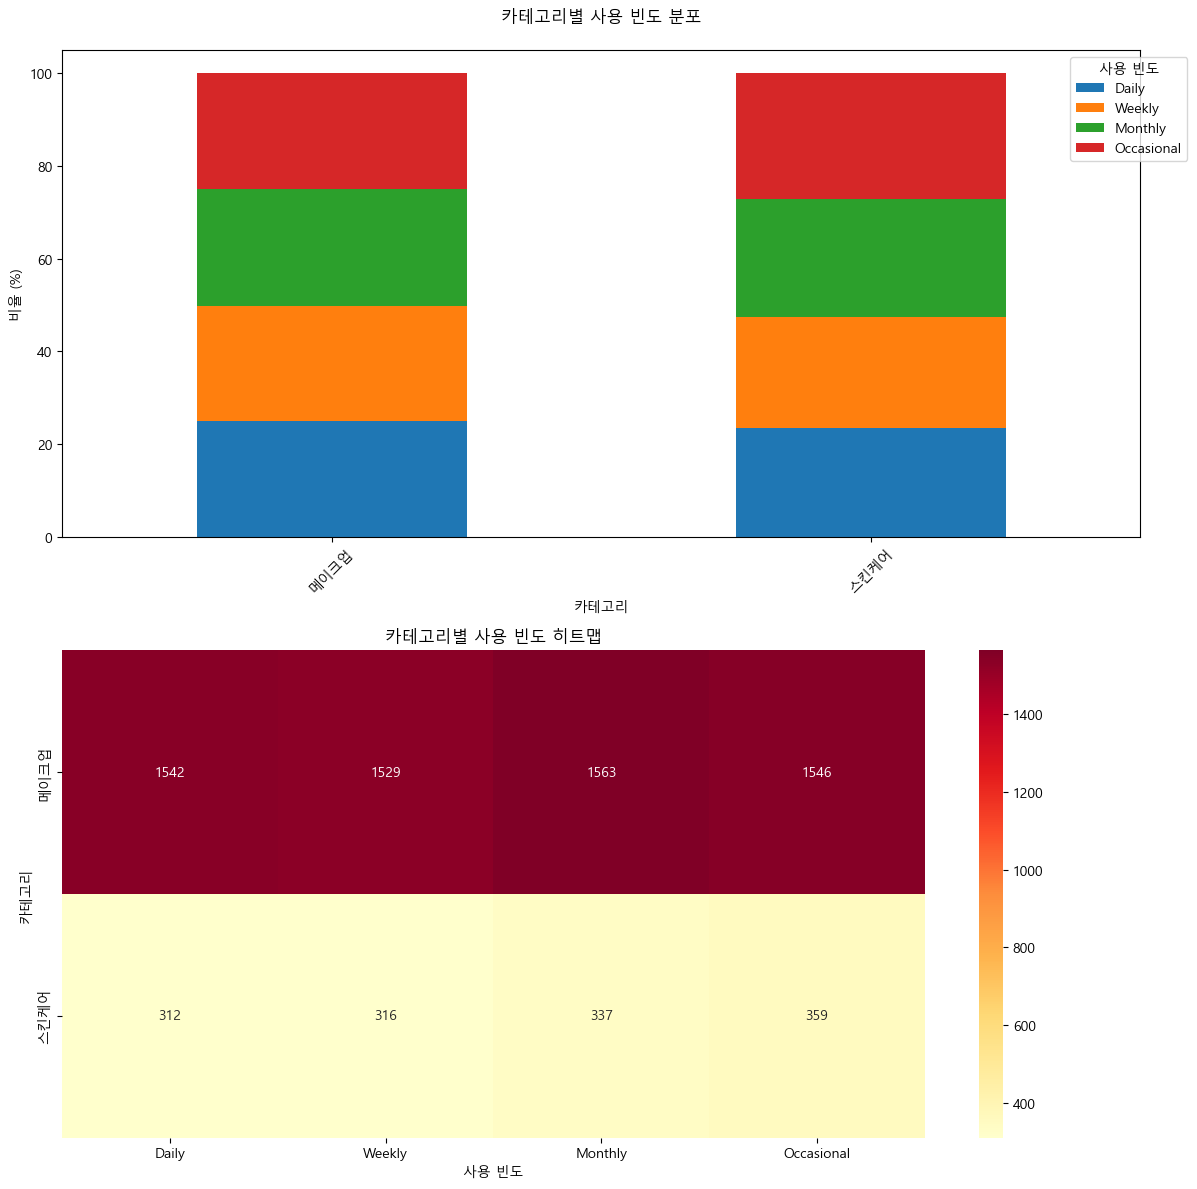

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')

# 카테고리 키워드 기반 분류 함수
def categorize_by_keyword(category):
    category = str(category).lower()
    if 'hair' in category:
        return '헤어케어'
    elif 'body' in category:
        return '바디케어'
    elif 'skin' in category or 'face' in category:
        return '스킨케어'
    elif 'make' in category or any(word in category for word in ['lip', 'eye', 'foundation', 'concealer', 'powder', 'mascara']):
        return '메이크업'
    else:
        return '기타'

# 카테고리 재분류
df['Category_Group'] = df['Category'].apply(categorize_by_keyword)

# 주요 카테고리만 선택
main_categories = ['헤어케어', '바디케어', '스킨케어', '메이크업']
df_main = df[df['Category_Group'].isin(main_categories)]

# Usage_Frequency를 순서가 있는 카테고리로 변환
frequency_order = ['Daily', 'Weekly', 'Monthly', 'Occasional']
df_main['Usage_Frequency'] = pd.Categorical(df_main['Usage_Frequency'], categories=frequency_order, ordered=True)

# 그래프 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# 1. 스택 바 차트 - 카테고리별 사용 빈도 비율
freq_by_category = pd.crosstab(df_main['Category_Group'], df_main['Usage_Frequency'], normalize='index') * 100
freq_by_category.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('카테고리별 사용 빈도 분포', pad=20)
ax1.set_xlabel('카테고리')
ax1.set_ylabel('비율 (%)')
ax1.legend(title='사용 빈도', bbox_to_anchor=(1.05, 1))
ax1.tick_params(axis='x', rotation=45)

# 2. 히트맵 - 카테고리별 사용 빈도 수
freq_counts = pd.crosstab(df_main['Category_Group'], df_main['Usage_Frequency'])
sns.heatmap(freq_counts, annot=True, fmt='d', cmap='YlOrRd', ax=ax2)
ax2.set_title('카테고리별 사용 빈도 히트맵')
ax2.set_xlabel('사용 빈도')
ax2.set_ylabel('카테고리')

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장
plt.savefig('usage_frequency_by_keyword.png', dpi=300, bbox_inches='tight')
print("사용 빈도 분포 그래프가 'usage_frequency_by_keyword.png' 파일로 저장되었습니다.")

# 상세 통계 출력
print("\n=== 카테고리별 사용 빈도 통계 ===")
for category in main_categories:
    category_data = df_main[df_main['Category_Group'] == category]
    freq_counts = category_data['Usage_Frequency'].value_counts()
    total = len(category_data)
    
    print(f"\n{category} (총 {total:,}개 제품):")
    print(f"원래 카테고리: {', '.join(category_data['Category'].unique())}")
    print("\n사용 빈도 분포:")
    for freq in frequency_order:
        count = freq_counts.get(freq, 0)
        percentage = (count / total) * 100
        print(f"- {freq}: {count:,}개 ({percentage:.1f}%)")

# 카테고리별 가장 많이 사용되는 제품 TOP 3
print("\n=== 카테고리별 Daily 사용 제품 TOP 3 ===")
for category in main_categories:
    daily_products = df_main[(df_main['Category_Group'] == category) & 
                            (df_main['Usage_Frequency'] == 'Daily')].nlargest(3, 'Rating')
    print(f"\n{category} TOP 3 Daily 사용 제품:")
    for _, product in daily_products.iterrows():
        print(f"- {product['Product_Name']} ({product['Category']}, 평점: {product['Rating']:.1f})")

리뷰 개수와 평점 관계 그래프가 'rating_by_reviews.png' 파일로 저장되었습니다.

=== 리뷰 개수 구간별 평점 통계 ===

매우 적음:
- 제품 수: 3,000.0개
- 평균 평점: 3.04 (표준편차: 1.18)
- 평점 범위: 1.0 ~ 5.0
- 리뷰 개수 범위: 52.0 ~ 2,050.0

적음:
- 제품 수: 3,000.0개
- 평균 평점: 2.99 (표준편차: 1.17)
- 평점 범위: 1.0 ~ 5.0
- 리뷰 개수 범위: 2,051.0 ~ 4,014.0

보통:
- 제품 수: 3,002.0개
- 평균 평점: 2.98 (표준편차: 1.16)
- 평점 범위: 1.0 ~ 5.0
- 리뷰 개수 범위: 4,015.0 ~ 5,960.0

많음:
- 제품 수: 3,000.0개
- 평균 평점: 2.99 (표준편차: 1.16)
- 평점 범위: 1.0 ~ 5.0
- 리뷰 개수 범위: 5,962.0 ~ 7,976.0

매우 많음:
- 제품 수: 2,998.0개
- 평균 평점: 3.01 (표준편차: 1.16)
- 평점 범위: 1.0 ~ 5.0
- 리뷰 개수 범위: 7,977.0 ~ 10,000.0

리뷰 개수와 평점의 상관계수: -0.0024

=== 리뷰 개수 구간별 최고 평점 제품 TOP 3 ===

매우 적음 구간 TOP 3:
- Perfect Lip Liner: 평점 5.0 (리뷰 1,194개)
- Ultra Lip Liner: 평점 5.0 (리뷰 273개)
- Ultra Contour: 평점 5.0 (리뷰 239개)

보통 구간 TOP 3:
- Ultra Bronzer: 평점 5.0 (리뷰 4,094개)
- Magic Moisturizer: 평점 5.0 (리뷰 4,037개)
- Divine Cleanser: 평점 5.0 (리뷰 4,798개)

많음 구간 TOP 3:
- Divine Face Oil: 평점 5.0 (리뷰 6,978개)
- Magic Eyeliner: 평점 5.0 (리뷰 7,174개)
- Divine BB Cream: 평점 

C:\Users\user\AppData\Local\Temp\ipykernel_15432\2920619891.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby('Review_Range').agg({


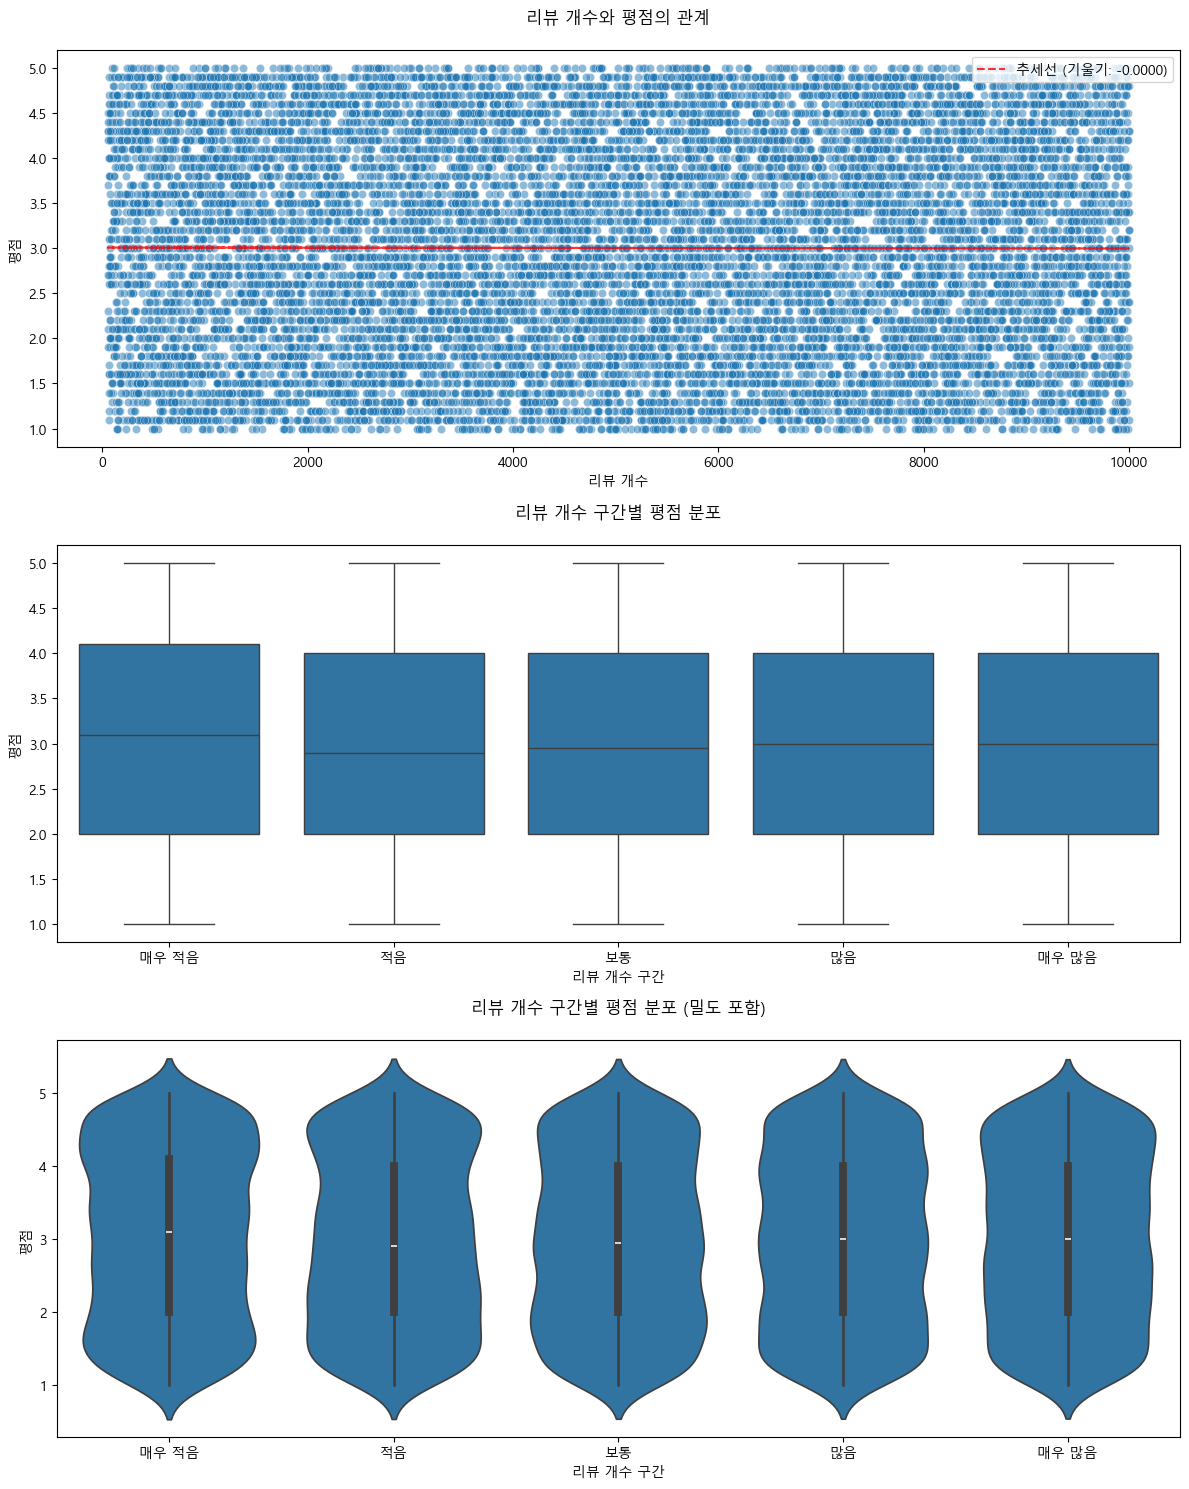

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')

# 리뷰 개수 구간 설정
df['Review_Range'] = pd.qcut(df['Number_of_Reviews'], q=5, labels=['매우 적음', '적음', '보통', '많음', '매우 많음'])

# 그래프 생성
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# 1. 산점도 - 리뷰 개수와 평점의 관계
sns.scatterplot(data=df, x='Number_of_Reviews', y='Rating', alpha=0.5, ax=ax1)
ax1.set_title('리뷰 개수와 평점의 관계', pad=20)
ax1.set_xlabel('리뷰 개수')
ax1.set_ylabel('평점')

# 추세선 추가
z = np.polyfit(df['Number_of_Reviews'], df['Rating'], 1)
p = np.poly1d(z)
ax1.plot(df['Number_of_Reviews'], p(df['Number_of_Reviews']), "r--", alpha=0.8, 
         label=f'추세선 (기울기: {z[0]:.4f})')
ax1.legend()

# 2. 박스플롯 - 리뷰 개수 구간별 평점 분포
sns.boxplot(data=df, x='Review_Range', y='Rating', ax=ax2)
ax2.set_title('리뷰 개수 구간별 평점 분포', pad=20)
ax2.set_xlabel('리뷰 개수 구간')
ax2.set_ylabel('평점')

# 3. 바이올린 플롯 - 리뷰 개수 구간별 평점 분포 (밀도 포함)
sns.violinplot(data=df, x='Review_Range', y='Rating', ax=ax3)
ax3.set_title('리뷰 개수 구간별 평점 분포 (밀도 포함)', pad=20)
ax3.set_xlabel('리뷰 개수 구간')
ax3.set_ylabel('평점')

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장
plt.savefig('rating_by_reviews.png', dpi=300, bbox_inches='tight')
print("리뷰 개수와 평점 관계 그래프가 'rating_by_reviews.png' 파일로 저장되었습니다.")

# 통계 정보 출력
print("\n=== 리뷰 개수 구간별 평점 통계 ===")
stats = df.groupby('Review_Range').agg({
    'Rating': ['count', 'mean', 'std', 'min', 'max'],
    'Number_of_Reviews': ['min', 'max']
}).round(2)

for range_name in stats.index:
    range_stats = stats.loc[range_name]
    print(f"\n{range_name}:")
    print(f"- 제품 수: {range_stats['Rating']['count']:,}개")
    print(f"- 평균 평점: {range_stats['Rating']['mean']:.2f} (표준편차: {range_stats['Rating']['std']:.2f})")
    print(f"- 평점 범위: {range_stats['Rating']['min']} ~ {range_stats['Rating']['max']}")
    print(f"- 리뷰 개수 범위: {range_stats['Number_of_Reviews']['min']:,} ~ {range_stats['Number_of_Reviews']['max']:,}")

# 상관관계 계산
correlation = df['Number_of_Reviews'].corr(df['Rating'])
print(f"\n리뷰 개수와 평점의 상관계수: {correlation:.4f}")

# 리뷰 개수 구간별 상위 평점 제품
print("\n=== 리뷰 개수 구간별 최고 평점 제품 TOP 3 ===")
for range_name in df['Review_Range'].unique():
    range_data = df[df['Review_Range'] == range_name].nlargest(3, 'Rating')
    print(f"\n{range_name} 구간 TOP 3:")
    for _, product in range_data.iterrows():
        print(f"- {product['Product_Name']}: 평점 {product['Rating']:.1f} "
              f"(리뷰 {product['Number_of_Reviews']:,}개)")

C:\Users\user\AppData\Local\Temp\ipykernel_15432\943885618.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_reviews = df.groupby('Rating_Grade')['Number_of_Reviews'].agg(['mean', 'count'])
C:\Users\user\AppData\Local\Temp\ipykernel_15432\943885618.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax4.text(i, v, f'평균: {v:,.0f}\n제품수: {avg_reviews["count"][i]:,}개',


평점 등급별 분석 그래프가 'rating_grade_analysis.png' 파일로 저장되었습니다.

=== 평점 등급별 리뷰 통계 ===

1점대:
- 제품 수: 3,630.0개
- 평균 리뷰 수: 4,970.27 (표준편차: 2,833.24)
- 리뷰 수 범위: 55.0 ~ 9,999.0
- 평균 평점: 1.47 (범위: 1.0 ~ 1.9)

2점대:
- 제품 수: 3,724.0개
- 평균 리뷰 수: 5,066.86 (표준편차: 2,824.67)
- 리뷰 수 범위: 52.0 ~ 9,999.0
- 평균 평점: 2.45 (범위: 2.0 ~ 2.9)

3점대:
- 제품 수: 3,576.0개
- 평균 리뷰 수: 5,085.39 (표준편차: 2,867.61)
- 리뷰 수 범위: 59.0 ~ 10,000.0
- 평균 평점: 3.44 (범위: 3.0 ~ 3.9)

4점대:
- 제품 수: 3,885.0개
- 평균 리뷰 수: 4,940.47 (표준편차: 2,895.39)
- 리뷰 수 범위: 52.0 ~ 9,999.0
- 평균 평점: 4.46 (범위: 4.0 ~ 4.9)

5점대:
- 제품 수: 185.0개
- 평균 리뷰 수: 4,990.66 (표준편차: 2,820.01)
- 리뷰 수 범위: 90.0 ~ 9,991.0
- 평균 평점: 5.00 (범위: 5.0 ~ 5.0)

평점과 리뷰 수의 상관계수: -0.0024

=== 평점 등급별 최다 리뷰 제품 TOP 3 ===

1점대 TOP 3:
- Super Mascara: 9,999개 리뷰 (평점: 1.5)
- Ultra CC Cream: 9,999개 리뷰 (평점: 1.1)
- Perfect Blush: 9,997개 리뷰 (평점: 1.9)

4점대 TOP 3:
- Super Cleanser: 9,999개 리뷰 (평점: 4.8)
- Magic Lip Gloss: 9,997개 리뷰 (평점: 4.3)
- Perfect Makeup Remover: 9,996개 리뷰 (평점: 4.3)

3점대 TOP 3:
- Ultra Eye Shad

C:\Users\user\AppData\Local\Temp\ipykernel_15432\943885618.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby('Rating_Grade').agg({


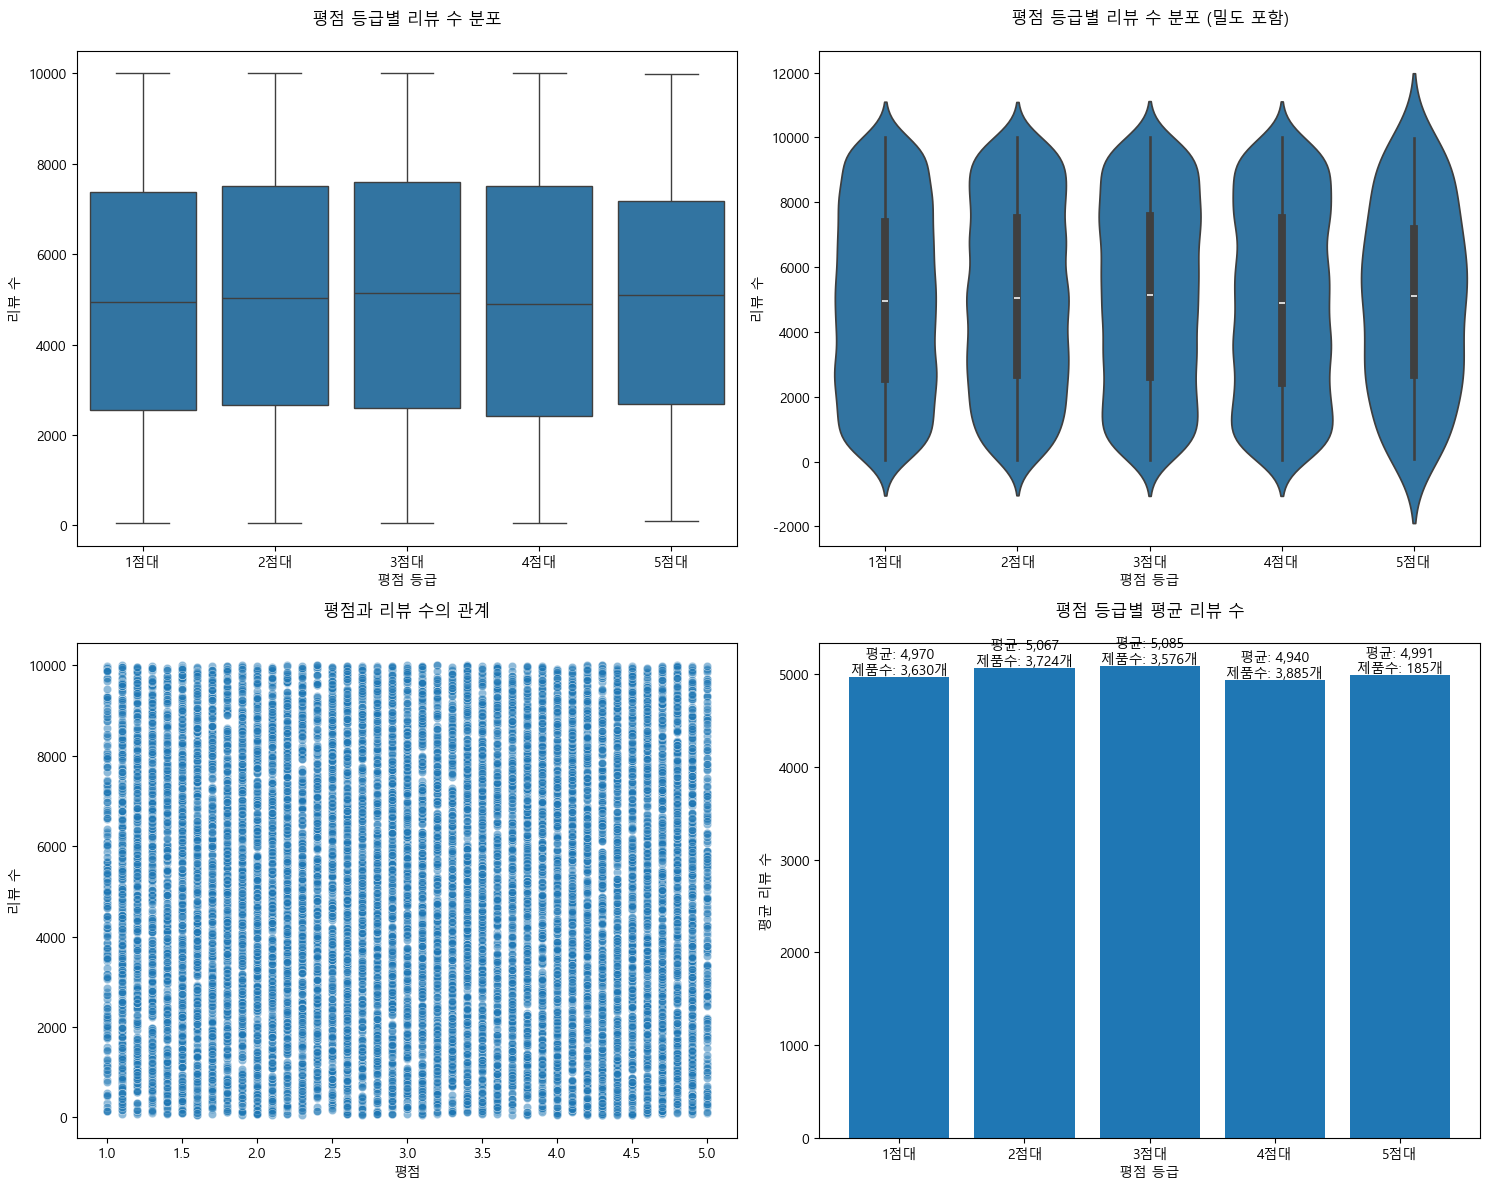

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')

# Rating 등급 설정 (1점대, 2점대, 3점대, 4점대, 5점대)
df['Rating_Grade'] = pd.cut(df['Rating'], 
                          bins=[0, 1.99, 2.99, 3.99, 4.99, 5.0],
                          labels=['1점대', '2점대', '3점대', '4점대', '5점대'])

# 그래프 생성
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. 박스플롯 - 등급별 리뷰 수 분포
sns.boxplot(data=df, x='Rating_Grade', y='Number_of_Reviews', ax=ax1)
ax1.set_title('평점 등급별 리뷰 수 분포', pad=20)
ax1.set_xlabel('평점 등급')
ax1.set_ylabel('리뷰 수')

# 2. 바이올린 플롯 - 등급별 리뷰 수 분포 (밀도 포함)
sns.violinplot(data=df, x='Rating_Grade', y='Number_of_Reviews', ax=ax2)
ax2.set_title('평점 등급별 리뷰 수 분포 (밀도 포함)', pad=20)
ax2.set_xlabel('평점 등급')
ax2.set_ylabel('리뷰 수')

# 3. 산점도 - Rating과 리뷰 수의 관계
sns.scatterplot(data=df, x='Rating', y='Number_of_Reviews', alpha=0.5, ax=ax3)
ax3.set_title('평점과 리뷰 수의 관계', pad=20)
ax3.set_xlabel('평점')
ax3.set_ylabel('리뷰 수')

# 4. 막대 그래프 - 등급별 평균 리뷰 수
avg_reviews = df.groupby('Rating_Grade')['Number_of_Reviews'].agg(['mean', 'count'])
ax4.bar(avg_reviews.index, avg_reviews['mean'])
ax4.set_title('평점 등급별 평균 리뷰 수', pad=20)
ax4.set_xlabel('평점 등급')
ax4.set_ylabel('평균 리뷰 수')

# 막대 위에 값 표시
for i, v in enumerate(avg_reviews['mean']):
    ax4.text(i, v, f'평균: {v:,.0f}\n제품수: {avg_reviews["count"][i]:,}개', 
             ha='center', va='bottom')

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장
plt.savefig('rating_grade_analysis.png', dpi=300, bbox_inches='tight')
print("평점 등급별 분석 그래프가 'rating_grade_analysis.png' 파일로 저장되었습니다.")

# 통계 정보 출력
print("\n=== 평점 등급별 리뷰 통계 ===")
stats = df.groupby('Rating_Grade').agg({
    'Number_of_Reviews': ['count', 'mean', 'std', 'min', 'max'],
    'Rating': ['mean', 'min', 'max']
}).round(2)

for grade in stats.index:
    grade_stats = stats.loc[grade]
    print(f"\n{grade}:")
    print(f"- 제품 수: {grade_stats['Number_of_Reviews']['count']:,}개")
    print(f"- 평균 리뷰 수: {grade_stats['Number_of_Reviews']['mean']:,.2f} "
          f"(표준편차: {grade_stats['Number_of_Reviews']['std']:,.2f})")
    print(f"- 리뷰 수 범위: {grade_stats['Number_of_Reviews']['min']:,} ~ "
          f"{grade_stats['Number_of_Reviews']['max']:,}")
    print(f"- 평균 평점: {grade_stats['Rating']['mean']:.2f} "
          f"(범위: {grade_stats['Rating']['min']} ~ {grade_stats['Rating']['max']})")

# 상관관계 계산
correlation = df['Rating'].corr(df['Number_of_Reviews'])
print(f"\n평점과 리뷰 수의 상관계수: {correlation:.4f}")

# 각 등급별 최다 리뷰 제품
print("\n=== 평점 등급별 최다 리뷰 제품 TOP 3 ===")
for grade in df['Rating_Grade'].unique():
    grade_data = df[df['Rating_Grade'] == grade].nlargest(3, 'Number_of_Reviews')
    print(f"\n{grade} TOP 3:")
    for _, product in grade_data.iterrows():
        print(f"- {product['Product_Name']}: {product['Number_of_Reviews']:,}개 리뷰 "
              f"(평점: {product['Rating']:.1f})")

C:\Users\user\AppData\Local\Temp\ipykernel_15432\2700651040.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(['동물실험 있음', '동물실험 없음'])


Cruelty-Free 분석 그래프가 'cruelty_free_analysis.png' 파일로 저장되었습니다.

=== Cruelty-Free 통계 ===

1. 전체 비율:
- 동물실험 있음: 7,592개 (50.6%)
- 동물실험 없음: 7,408개 (49.4%)

2. 카테고리별 Cruelty-Free 비율:

BB Cream:
- 총 제품 수: 613개
- 동물실험 없는 제품: 305개 (49.8%)

Blush:
- 총 제품 수: 628개
- 동물실험 없는 제품: 324개 (51.6%)

Bronzer:
- 총 제품 수: 631개
- 동물실험 없는 제품: 310개 (49.1%)

CC Cream:
- 총 제품 수: 594개
- 동물실험 없는 제품: 299개 (50.3%)

Cleanser:
- 총 제품 수: 614개
- 동물실험 없는 제품: 323개 (52.6%)

Concealer:
- 총 제품 수: 633개
- 동물실험 없는 제품: 313개 (49.4%)

Contour:
- 총 제품 수: 604개
- 동물실험 없는 제품: 311개 (51.5%)

Exfoliator:
- 총 제품 수: 583개
- 동물실험 없는 제품: 294개 (50.4%)

Eye Shadow:
- 총 제품 수: 582개
- 동물실험 없는 제품: 264개 (45.4%)

Eyeliner:
- 총 제품 수: 629개
- 동물실험 없는 제품: 298개 (47.4%)

Face Mask:
- 총 제품 수: 653개
- 동물실험 없는 제품: 327개 (50.1%)

Face Oil:
- 총 제품 수: 671개
- 동물실험 없는 제품: 316개 (47.1%)

Foundation:
- 총 제품 수: 613개
- 동물실험 없는 제품: 302개 (49.3%)

Highlighter:
- 총 제품 수: 653개
- 동물실험 없는 제품: 334개 (51.1%)

Lip Gloss:
- 총 제품 수: 571개
- 동물실험 없는 제품: 287개 (50.3%)

Lip Liner:
- 총 제품 수:

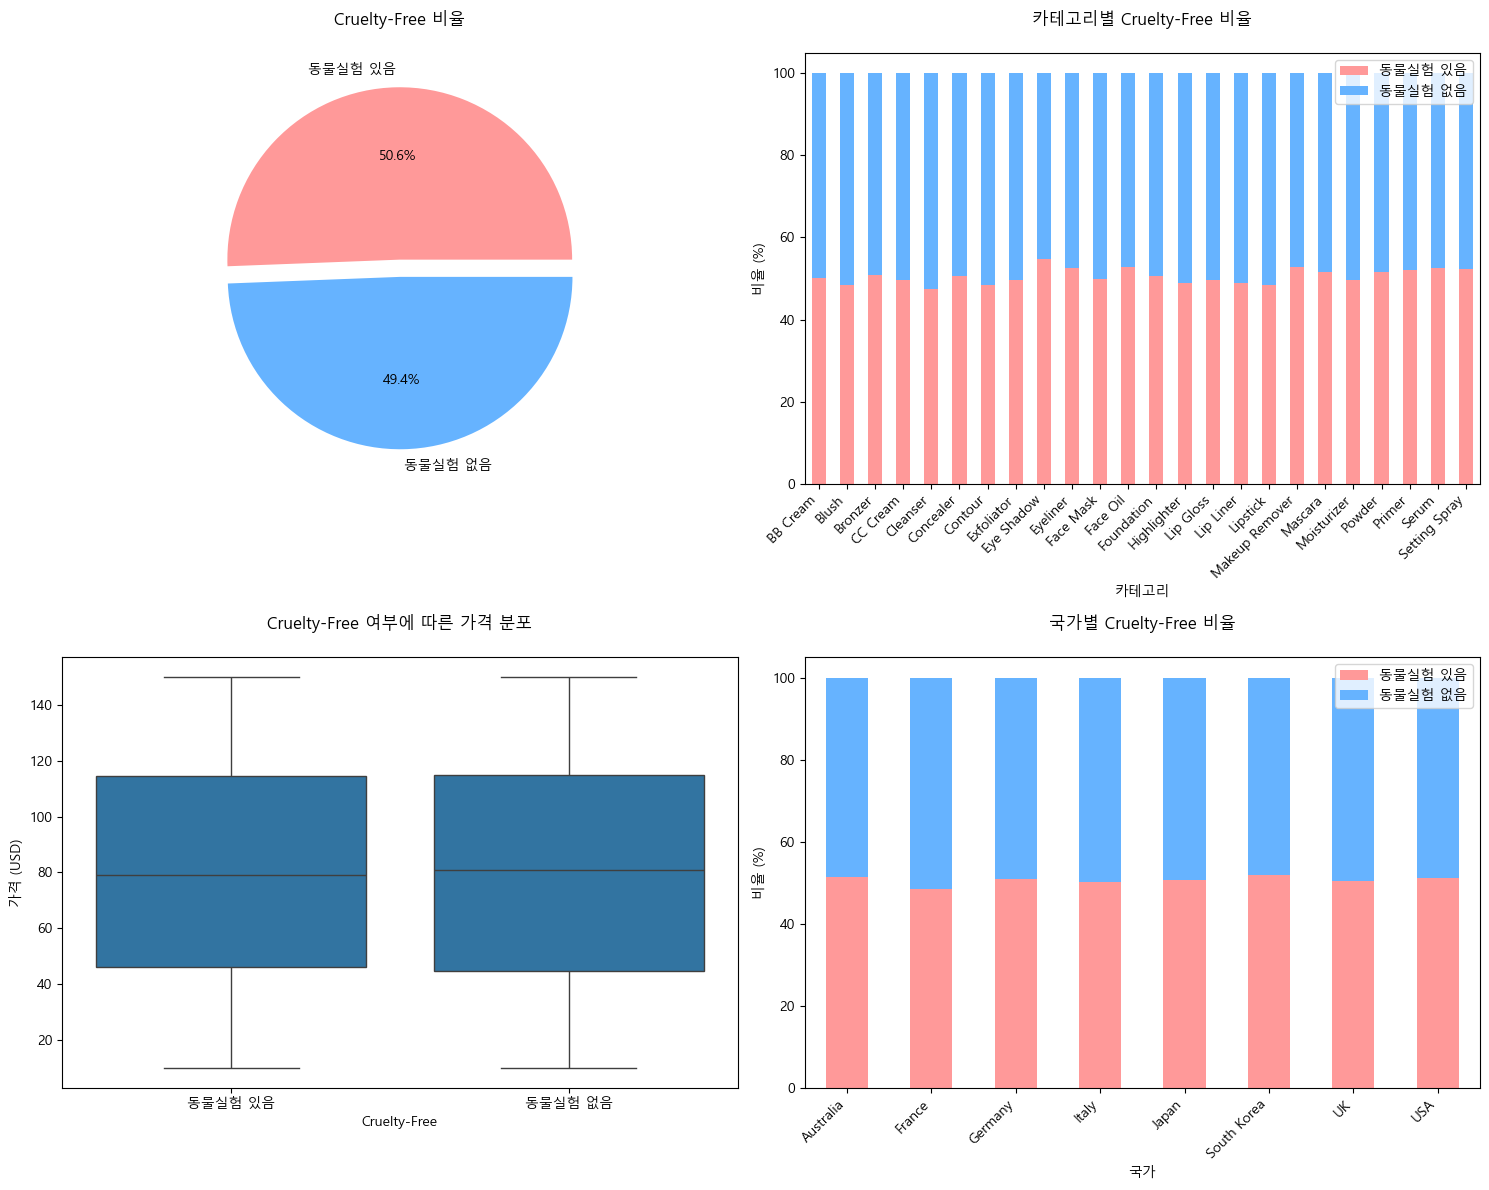

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')

# 그래프 생성
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. 파이 차트 - 전체 비율
cruelty_free_counts = df['Cruelty_Free'].value_counts()
colors = ['#ff9999', '#66b3ff']
ax1.pie(cruelty_free_counts, labels=['동물실험 있음', '동물실험 없음'], 
        autopct='%1.1f%%', colors=colors,
        explode=[0.05, 0.05])
ax1.set_title('Cruelty-Free 비율', pad=20)

# 2. 막대 그래프 - 카테고리별 Cruelty-Free 비율
category_cruelty = pd.crosstab(df['Category'], df['Cruelty_Free'], normalize='index') * 100
category_cruelty.plot(kind='bar', stacked=True, ax=ax2, color=colors)
ax2.set_title('카테고리별 Cruelty-Free 비율', pad=20)
ax2.set_xlabel('카테고리')
ax2.set_ylabel('비율 (%)')
ax2.legend(['동물실험 있음', '동물실험 없음'])
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# 3. 박스플롯 - Cruelty-Free 여부에 따른 가격 분포
sns.boxplot(data=df, x='Cruelty_Free', y='Price_USD', ax=ax3)
ax3.set_title('Cruelty-Free 여부에 따른 가격 분포', pad=20)
ax3.set_xlabel('Cruelty-Free')
ax3.set_ylabel('가격 (USD)')
ax3.set_xticklabels(['동물실험 있음', '동물실험 없음'])

# 4. 막대 그래프 - 국가별 Cruelty-Free 비율
country_cruelty = pd.crosstab(df['Country_of_Origin'], df['Cruelty_Free'], normalize='index') * 100
country_cruelty.plot(kind='bar', stacked=True, ax=ax4, color=colors)
ax4.set_title('국가별 Cruelty-Free 비율', pad=20)
ax4.set_xlabel('국가')
ax4.set_ylabel('비율 (%)')
ax4.legend(['동물실험 있음', '동물실험 없음'])
plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장
plt.savefig('cruelty_free_analysis.png', dpi=300, bbox_inches='tight')
print("Cruelty-Free 분석 그래프가 'cruelty_free_analysis.png' 파일로 저장되었습니다.")

# 통계 정보 출력
print("\n=== Cruelty-Free 통계 ===")
total_count = len(df)
cruelty_stats = df['Cruelty_Free'].value_counts()
print("\n1. 전체 비율:")
for status, count in cruelty_stats.items():
    percentage = (count / total_count) * 100
    print(f"- {'동물실험 없음' if status else '동물실험 있음'}: {count:,}개 ({percentage:.1f}%)")

print("\n2. 카테고리별 Cruelty-Free 비율:")
category_stats = pd.crosstab(df['Category'], df['Cruelty_Free'])
for category in category_stats.index:
    total = category_stats.loc[category].sum()
    cruelty_free_count = category_stats.loc[category, True]
    percentage = (cruelty_free_count / total) * 100
    print(f"\n{category}:")
    print(f"- 총 제품 수: {total:,}개")
    print(f"- 동물실험 없는 제품: {cruelty_free_count:,}개 ({percentage:.1f}%)")

print("\n3. 가격 통계:")
price_stats = df.groupby('Cruelty_Free')['Price_USD'].agg(['mean', 'median', 'std']).round(2)
for status, stats in price_stats.iterrows():
    print(f"\n{'동물실험 없음' if status else '동물실험 있음'}:")
    print(f"- 평균 가격: ${stats['mean']:,.2f}")
    print(f"- 중간 가격: ${stats['median']:,.2f}")
    print(f"- 표준편차: ${stats['std']:,.2f}")

print("\n4. 국가별 Cruelty-Free 비율 TOP 5:")
country_stats = pd.crosstab(df['Country_of_Origin'], df['Cruelty_Free'])
country_stats['비율'] = (country_stats[True] / (country_stats[True] + country_stats[False]) * 100).round(1)
print(country_stats.nlargest(5, '비율')[['비율']].to_string())

C:\Users\user\AppData\Local\Temp\ipykernel_15432\594833592.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skin_type_counts.index, y=skin_type_counts.values,
C:\Users\user\AppData\Local\Temp\ipykernel_15432\594833592.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_skin_type.index, y=avg_price_by_skin_type.values,


피부 타입 분석 그래프가 'skin_type_analysis.png' 파일로 저장되었습니다.

=== 피부 타입 통계 ===

1. 피부 타입별 제품 수:
- Combination: 3,060개 (20.4%)
- Oily: 3,009개 (20.1%)
- Normal: 2,991개 (19.9%)
- Sensitive: 2,975개 (19.8%)
- Dry: 2,965개 (19.8%)

2. 카테고리별 주요 피부 타입:

Blush:
- 가장 많은 피부 타입: Normal (21.8%)
- 총 제품 수: 628개

Makeup Remover:
- 가장 많은 피부 타입: Sensitive (21.5%)
- 총 제품 수: 636개

Highlighter:
- 가장 많은 피부 타입: Combination (21.3%)
- 총 제품 수: 653개

Face Mask:
- 가장 많은 피부 타입: Combination (23.6%)
- 총 제품 수: 653개

Foundation:
- 가장 많은 피부 타입: Normal (21.0%)
- 총 제품 수: 613개

Powder:
- 가장 많은 피부 타입: Dry (21.5%)
- 총 제품 수: 599개

Lip Gloss:
- 가장 많은 피부 타입: Oily (22.6%)
- 총 제품 수: 571개

CC Cream:
- 가장 많은 피부 타입: Dry (21.7%)
- 총 제품 수: 594개

Eye Shadow:
- 가장 많은 피부 타입: Dry (23.5%)
- 총 제품 수: 582개

Concealer:
- 가장 많은 피부 타입: Sensitive (20.9%)
- 총 제품 수: 633개

Eyeliner:
- 가장 많은 피부 타입: Normal (22.7%)
- 총 제품 수: 629개

Lipstick:
- 가장 많은 피부 타입: Combination (22.7%)
- 총 제품 수: 633개

Setting Spray:
- 가장 많은 피부 타입: Normal (21.4%)
- 총 제품 수: 622개

Cleanser:


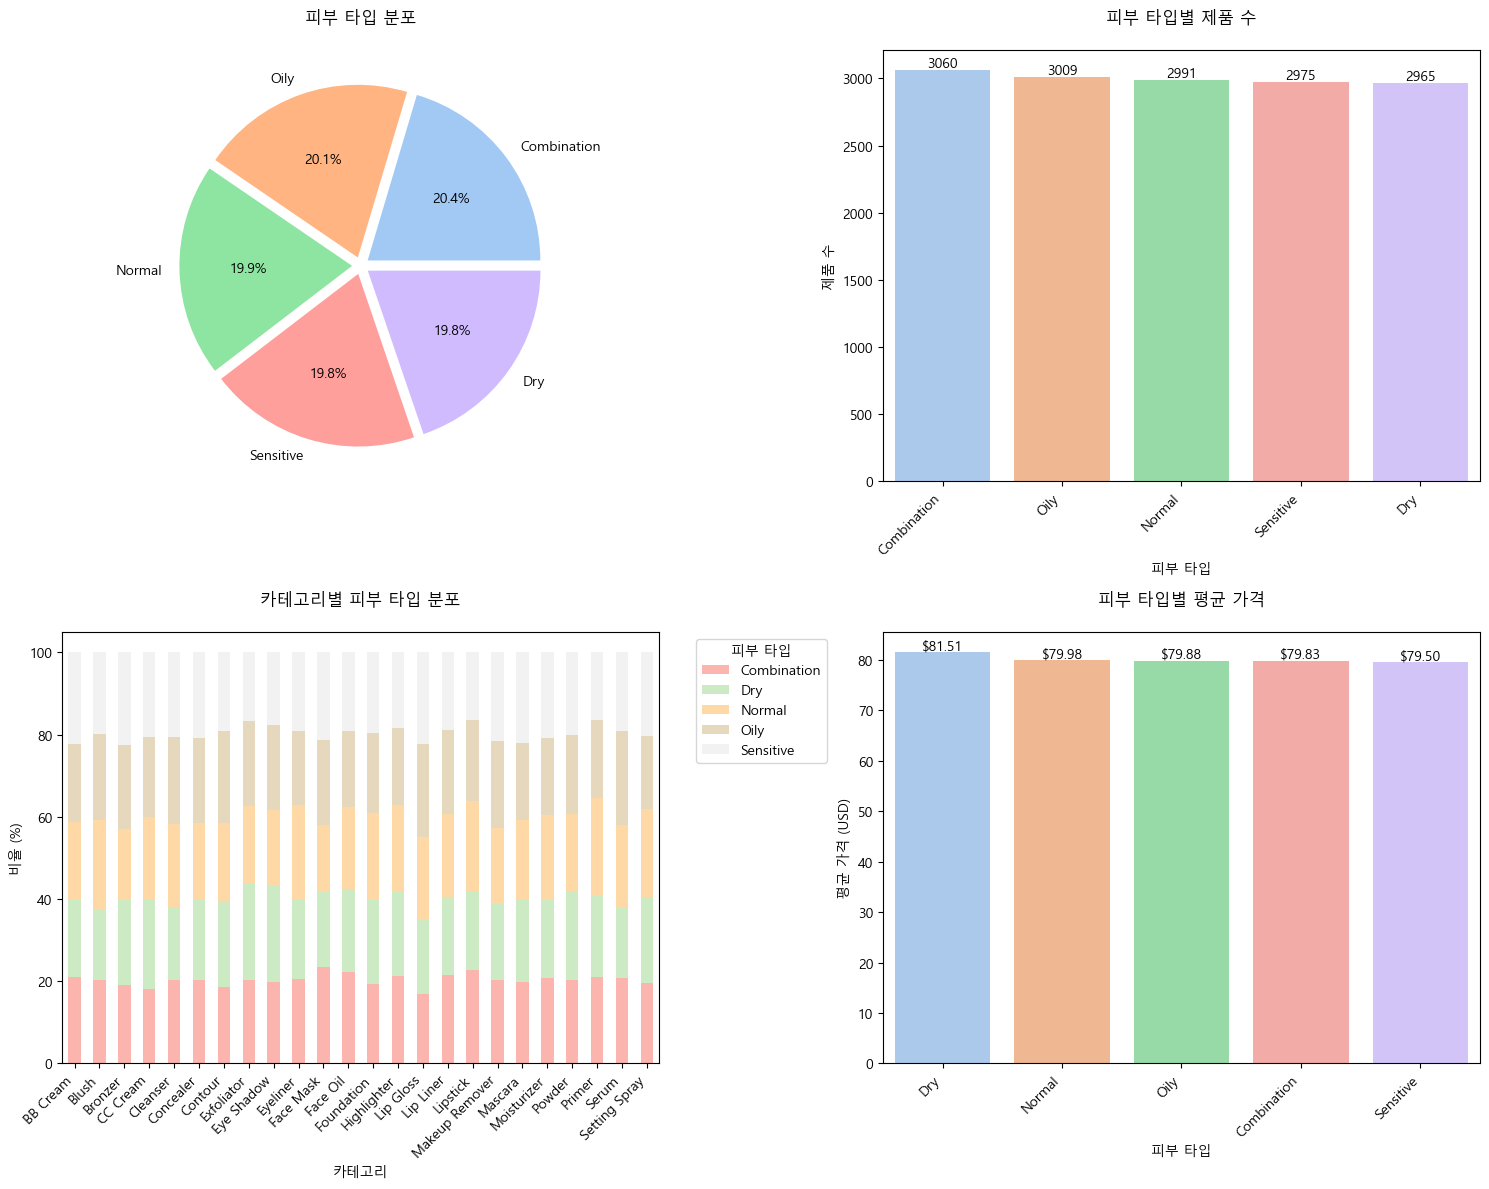

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')

# 그래프 생성을 위한 figure 설정
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. 파이 차트 - 전체 피부 타입 분포
skin_type_counts = df['Skin_Type'].value_counts()
colors = sns.color_palette('pastel')
ax1.pie(skin_type_counts, labels=skin_type_counts.index, 
        autopct='%1.1f%%', colors=colors,
        explode=[0.05] * len(skin_type_counts))
ax1.set_title('피부 타입 분포', pad=20)

# 2. 막대 그래프 - 피부 타입별 제품 수
sns.barplot(x=skin_type_counts.index, y=skin_type_counts.values, 
           palette='pastel', ax=ax2)
ax2.set_title('피부 타입별 제품 수', pad=20)
ax2.set_xlabel('피부 타입')
ax2.set_ylabel('제품 수')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# 각 막대 위에 값 표시
for i, v in enumerate(skin_type_counts.values):
    ax2.text(i, v, str(v), ha='center', va='bottom')

# 3. 카테고리별 피부 타입 분포
category_skin_type = pd.crosstab(df['Category'], df['Skin_Type'], normalize='index') * 100
category_skin_type.plot(kind='bar', stacked=True, ax=ax3, 
                       colormap='Pastel1')
ax3.set_title('카테고리별 피부 타입 분포', pad=20)
ax3.set_xlabel('카테고리')
ax3.set_ylabel('비율 (%)')
plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')
ax3.legend(title='피부 타입', bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. 피부 타입별 평균 가격
avg_price_by_skin_type = df.groupby('Skin_Type')['Price_USD'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_skin_type.index, y=avg_price_by_skin_type.values, 
           palette='pastel', ax=ax4)
ax4.set_title('피부 타입별 평균 가격', pad=20)
ax4.set_xlabel('피부 타입')
ax4.set_ylabel('평균 가격 (USD)')
plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')

# 각 막대 위에 값 표시
for i, v in enumerate(avg_price_by_skin_type.values):
    ax4.text(i, v, f'${v:.2f}', ha='center', va='bottom')

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장
plt.savefig('skin_type_analysis.png', dpi=300, bbox_inches='tight')
print("피부 타입 분석 그래프가 'skin_type_analysis.png' 파일로 저장되었습니다.")

# 통계 정보 출력
print("\n=== 피부 타입 통계 ===")
print("\n1. 피부 타입별 제품 수:")
for skin_type, count in skin_type_counts.items():
    percentage = (count / len(df)) * 100
    print(f"- {skin_type}: {count:,}개 ({percentage:.1f}%)")

print("\n2. 카테고리별 주요 피부 타입:")
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]['Skin_Type'].value_counts()
    top_skin_type = category_data.index[0]
    percentage = (category_data[top_skin_type] / category_data.sum()) * 100
    print(f"\n{category}:")
    print(f"- 가장 많은 피부 타입: {top_skin_type} ({percentage:.1f}%)")
    print(f"- 총 제품 수: {category_data.sum():,}개")

print("\n3. 피부 타입별 가격 통계:")
price_stats = df.groupby('Skin_Type')['Price_USD'].agg(['mean', 'median', 'std', 'count']).round(2)
price_stats = price_stats.sort_values('count', ascending=False)
for skin_type, stats in price_stats.iterrows():
    print(f"\n{skin_type}:")
    print(f"- 제품 수: {stats['count']:,}개")
    print(f"- 평균 가격: ${stats['mean']:,.2f}")
    print(f"- 중간 가격: ${stats['median']:,.2f}")
    print(f"- 표준편차: ${stats['std']:,.2f}")